In [1]:
# packages
import zipfile as zip
import csv
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pickle

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
patent_measures = pd.read_csv('patent_measures_0726.csv', index_col=0)
assignee_identifiers = pd.read_csv('assignee_identifiers_0717.csv', index_col=0)
date_permno_gvkey = pd.read_csv('date_permno_gvkey.csv', index_col=0)
with zip.ZipFile('g_assignee_disambiguated.tsv.zip', 'r') as zip_ref:
    with zip_ref.open('g_assignee_disambiguated.tsv') as file:
        assignee = pd.read_csv(file, delimiter='\t')
with zip.ZipFile('g_location_disambiguated.tsv.zip', 'r') as zip_ref:
    with zip_ref.open('g_location_disambiguated.tsv') as file:
        location = pd.read_csv(file, delimiter='\t')

/state/partition1/job-50095475/ipykernel_1529450/405177299.py:1: DtypeWarning: Columns (39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  patent_measures = pd.read_csv('patent_measures_0726.csv', index_col=0)


In [26]:
patent_measures.nunique()

patent_id       7880577
patent_date        2529
patent_title    5912469
num_claims          387
withdrawn             2
                 ...   
latitude          34597
longitude         34598
county             2302
state_fips           56
county_fips         290
Length: 61, dtype: int64

In [25]:
patent_measures[['patent_id'].nunique()/len(patent_measures)

0.9664566003846167

In [3]:
patent_measures_generality = patent_measures[patent_measures['generality_10yr'].notna()]

In [4]:
patent_measures_generality['has_permno'] = np.where(patent_measures_generality['permno'].notna() | patent_measures_generality['permno_adj'].notna(), 1, 0)

/state/partition1/job-48955138/ipykernel_2861189/509083345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patent_measures_generality['has_permno'] = np.where(patent_measures_generality['permno'].notna() | patent_measures_generality['permno_adj'].notna(), 1, 0)


In [19]:
len(patent_measures_generality[patent_measures_generality['has_permno']==1])/len(patent_measures_generality)

0.3895340296453214

In [33]:
len(patent_measures_generality[(patent_measures_generality['generality_10yr']>0.9)&(patent_measures_generality['has_permno']==1)])/len(patent_measures_generality[patent_measures_generality['generality_10yr']>0.9])

0.36744712990936557

In [5]:
df = patent_measures_generality[patent_measures_generality['citations_10yr']>=5]

In [6]:
df

,patent_id,patent_date,patent_title,num_claims,withdrawn,bsim5,fsim01,fsim25,fsim610,lqsim05,...,publn_kind,pat_publn_id,appln_id,publn_year,name_std,id_name,sample,permno_adj,id_name1,has_permno
0,10000000,2018-06-19,Coherent LADAR using intra-pixel quadrature de...,20,0,16137348.0,3717139.0,13095141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,10000007,2018-06-19,PEX expanding tool,24,0,4908779.0,1134887.0,2617792.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
21,10000023,2018-06-19,Apparatus and method for forming three-dimensi...,20,0,1725530.0,403463.0,1222673.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
99,10000100,2018-06-19,Piezoelectric based system and method for dete...,14,0,3134373.0,706902.0,3253276.0,3620963.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100,10000101,2018-06-19,Machine for fitting and removing a tyre and me...,20,0,5669661.0,1476220.0,4780382.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164188,9999969,2018-06-19,Drill attachment with drive assembly,30,0,6324690.0,1487339.0,5038830.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8164190,9999971,2018-06-19,Ergonomic automated workstation,16,0,4369951.0,1198377.0,3710009.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8164196,9999977,2018-06-19,Systems and methods for providing vacuum valve...,34,0,4993025.0,1227122.0,2853211.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8164199,9999980,2018-06-19,Shaving aid adaptor for a shaving cartridge,30,0,753234.0,198897.0,811123.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
# Count non-NA values for each column
non_na_counts = df.notna().sum()

# Calculate the percentage of non-NA values
non_na_percentages = (non_na_counts / len(df)) * 100

# Combine counts and percentages into a summary dataframe
summary_df = pd.DataFrame({
    'Non-NA Count': non_na_counts,
    'Non-NA Percentage': non_na_percentages
})

# Sort the summary by Non-NA Count in descending order
summary_df = summary_df.sort_values('Non-NA Count', ascending=False)

# Display the summary
print(summary_df)

# Optionally, you can save this summary to a CSV file
# summary_df.to_csv('data_summary.csv')

                                         Non-NA Count  Non-NA Percentage
has_permno                                    2484635         100.000000
patent_id                                     2484635         100.000000
patent_date                                   2484635         100.000000
patent_title                                  2484635         100.000000
num_claims                                    2484635         100.000000
...                                               ...                ...
pat_publn_id                                   694351          27.945795
disambig_assignee_individual_name_first         48777           1.963145
disambig_assignee_individual_name_last          48777           1.963145
halloffame                                        172           0.006923
kelly_significant                                 172           0.006923

[71 rows x 2 columns]


In [51]:
summary_df.to_csv('data_summary.csv')

In [8]:
# Function to calculate terciles
def tercile(x):
    return pd.qcut(x, q=3, labels=['Low', 'Medium', 'High'])

In [9]:
df = df[(df['filing_year']>1967) & (df['filing_year']<2023)]

In [10]:
df['generality_tercile_adjusted'] = df.groupby('filing_year')['generality_10yr_adjusted'].transform(tercile)

/state/partition1/job-48955138/ipykernel_2861189/2641760903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generality_tercile_adjusted'] = df.groupby('filing_year')['generality_10yr_adjusted'].transform(tercile)


In [70]:
df.columns

Index(['patent_id', 'patent_date', 'patent_title', 'num_claims', 'withdrawn',
       'bsim5', 'fsim01', 'fsim25', 'fsim610', 'lqsim05', 'lqsim010',
       'bk_p90_alqsim05', 'bk_p90_alqsim010', 'fcitALL', 'backward_citations',
       'cd_5', 'mcd_5', 'i_5', 'cd_10', 'mcd_10', 'i_10', 'cd_2017y',
       'mcd_2017y', 'i_2017y', 'permno', 'xi_nominal', 'xi_real', 'cites',
       'new_word', 'new_word_reuse', 'new_bigram', 'new_bigram_reuse',
       'new_trigram', 'new_trigram_reuse', 'new_word_comb',
       'new_word_comb_reuse', 'backward_cosine', 'forward_cosine',
       'filing_date', 'generality_10yr', 'citations_10yr', 'cpc_subclass',
       'filing_year', 'generality_10yr_adjusted', 'kelly_significant',
       'halloffame', 'assignee_sequence', 'assignee_id',
       'disambig_assignee_individual_name_first',
       'disambig_assignee_individual_name_last',
       'disambig_assignee_organization', 'assignee_type', 'location_id',
       'disambig_city', 'disambig_state', 'disambig_cou

In [11]:
def group_statistics(df, column, group_column):
    return df.groupby(group_column)[column].agg(['mean', 'median', 'std', 'min', 'max'])

In [12]:
df['halloffame'] = df['halloffame'].fillna(0)
df['kelly_significant'] = df['kelly_significant'].fillna(0)

/state/partition1/job-48955138/ipykernel_2861189/521719404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['halloffame'] = df['halloffame'].fillna(0)
/state/partition1/job-48955138/ipykernel_2861189/521719404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kelly_significant'] = df['kelly_significant'].fillna(0)


In [13]:
stats_summary = group_statistics(df, 'lqsim010', 'generality_tercile_adjusted')
print(stats_summary)

                                 mean    median       std       min       max
generality_tercile_adjusted                                                  
Low                          1.009915  0.971652  0.271298 -1.552366  4.298588
Medium                       1.034970  0.991856  0.294104 -1.638365  4.383748
High                         1.002482  0.971826  0.266869 -1.599553  4.209474


/state/partition1/job-48955138/ipykernel_2861189/3576173529.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(group_column)[column].agg(['mean', 'median', 'std', 'min', 'max'])


In [16]:
df.groupby('generality_tercile_adjusted')['has_permno'].mean()

/state/partition1/job-48955138/ipykernel_2861189/3065639018.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('generality_tercile_adjusted')['has_permno'].mean()


generality_tercile_adjusted
Low       0.454235
Medium    0.449573
High      0.402727
Name: has_permno, dtype: float64

In [22]:
df['patent_id'].nunique()

2416519

In [20]:
df['assignee_type'].unique()

array([ 2.,  3., nan,  5.,  6.,  4.,  7.,  9., 14., 12., 15., 13.,  8.,
        1.,  0.])

In [57]:

# Assuming we have our dataframe 'df' with 'Value' and 'Value_tercile' columns

# 1. Basic statistics


# 2. Visualization: Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Value_tercile', y='Value', data=df[df['Value_tercile'].isin(['Low', 'High'])])
plt.title('Distribution of Values in Low and High Groups')
plt.show()

# 3. Visualization: Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['Value_tercile'].isin(['Low', 'High'])], x='Value', hue='Value_tercile', element='step', stat='density', common_norm=False)
plt.title('Distribution of Values in Low and High Groups')
plt.show()

# 4. Statistical Test: T-test
low_group = df[df['Value_tercile'] == 'Low']['Value']
high_group = df[df['Value_tercile'] == 'High']['Value']
t_stat, p_value = stats.ttest_ind(low_group, high_group)
print(f"\nT-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# 5. Effect Size: Cohen's d
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

effect_size = cohen_d(low_group, high_group)
print(f"Cohen's d effect size: {effect_size:.4f}")

# 6. Correlation with other variables (if available)
# Assuming we have other numeric columns in our dataframe
numeric_columns = df.select_dtypes(include=[np.number]).columns.drop('Value')
if len(numeric_columns) > 0:
    print("\nCorrelations with other numeric variables:")
    for col in numeric_columns:
        correlation = df[df['Value_tercile'].isin(['Low', 'High'])].groupby('Value_tercile')[col].mean()
        print(f"{col}: Low = {correlation['Low']:.4f}, High = {correlation['High']:.4f}")

# 7. Categorical variable analysis (if available)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.drop('Value_tercile')
if len(categorical_columns) > 0:
    print("\nDistribution in categorical variables:")
    for col in categorical_columns:
        print(f"\n{col}:")
        print(df[df['Value_tercile'].isin(['Low', 'High'])].groupby(['Value_tercile', col]).size().unstack(fill_value=0))

filing_year
1967.0         1
1968.0         5
1969.0        11
1970.0        27
1971.0       104
1972.0       308
1973.0      1746
1974.0      8818
1975.0     15332
1976.0     16119
1977.0     16730
1978.0     16961
1979.0     18733
1980.0     20288
1981.0     20802
1982.0     22390
1983.0     23109
1984.0     26980
1985.0     30878
1986.0     34387
1987.0     39209
1988.0     44864
1989.0     49514
1990.0     53010
1991.0     55812
1992.0     60434
1993.0     65182
1994.0     76178
1995.0     89716
1996.0     92482
1997.0    108490
1998.0    105610
1999.0    110085
2000.0    113369
2001.0    107558
2002.0     99303
2003.0     88160
2004.0     80903
2005.0     74935
2006.0     72159
2007.0     70713
2008.0     65739
2009.0     62148
2010.0     63545
2011.0     64108
2012.0     63626
2013.0     57856
2014.0     48799
2015.0     41603
2016.0     32777
2017.0     24288
2018.0     15488
2019.0      8637
2020.0      3410
2021.0      1002
2022.0       190
2023.0         4
Name: patent_id, dt

In [ ]:

# Add a new column 'Value_tercile' based on the terciles of 'Value' within each 'Group'
df['Value_tercile'] = df.groupby('Group')['Value'].transform(tercile)

# Display the first few rows of the dataframe
print(df.head(10))

# To verify, we can check the distribution of terciles within each group
print(df.groupby('Group')['Value_tercile'].value_counts(normalize=True).unstack())

In [3]:
patent_measures = pd.read_csv('patent_measures_0726.csv', index_col=0)

/state/partition1/job-49926879/ipykernel_2207488/2208833771.py:1: DtypeWarning: Columns (39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  patent_measures = pd.read_csv('patent_measures_0726.csv', index_col=0)


In [5]:
patent_measures.columns

Index(['patent_id', 'patent_date', 'patent_title', 'num_claims', 'withdrawn',
       'bsim5', 'fsim01', 'fsim25', 'fsim610', 'lqsim05', 'lqsim010',
       'bk_p90_alqsim05', 'bk_p90_alqsim010', 'fcitALL', 'backward_citations',
       'cd_5', 'mcd_5', 'i_5', 'cd_10', 'mcd_10', 'i_10', 'cd_2017y',
       'mcd_2017y', 'i_2017y', 'permno', 'xi_nominal', 'xi_real', 'cites',
       'new_word', 'new_word_reuse', 'new_bigram', 'new_bigram_reuse',
       'new_trigram', 'new_trigram_reuse', 'new_word_comb',
       'new_word_comb_reuse', 'backward_cosine', 'forward_cosine',
       'filing_date', 'generality_10yr', 'citations_10yr', 'cpc_subclass',
       'filing_year', 'generality_10yr_adjusted', 'kelly_significant',
       'halloffame'],
      dtype='object')

In [11]:
date_permno_gvkey

,patent_id,filing_date,permno,source,gvkey,lpermno,linkdt,linkenddt,filing_year,fyear,at,prcc_f,csho,sale,emp,ppent,teq,non_nan_count
0,10000000,2015-03-10,24942.0,kpss,8972,24942.0,1962-02-28,2020-04-30,2015,2015.0,29281.0,124.530,299.000,23247.0,61.000,2005.0,10330.0,9.0
1,10000003,2013-03-12,23579.0,kpss,10519,23579.0,1962-01-31,NaN,2013,2013.0,12944.0,36.760,282.059,12104.0,32.000,2215.0,4384.0,9.0
2,10000018,2016-05-06,14593.0,kpss,1690,14593.0,1980-12-12,NaN,2016,2016.0,321686.0,113.050,5336.166,215091.0,116.000,27010.0,128249.0,9.0
3,10000019,2016-04-08,19561.0,kpss,2285,19561.0,1962-01-31,NaN,2016,2016.0,89997.0,155.680,617.152,94571.0,150.500,12807.0,877.0,9.0
4,10000022,2012-12-05,61567.0,kpss,5608,61567.0,1972-12-14,NaN,2012,2012.0,1603.1,26.960,99.900,1578.2,NaN,914.4,994.1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036644,9226066,2010-04-09,13610.0,discern,8123,13610.0,1962-01-31,NaN,2010,2010.0,2048.7,20.520,79.579,1585.9,3.700,675.0,830.3,9.0
3036653,9226121,2013-08-02,13407.0,discern,170617,13407.0,2012-05-18,NaN,2013,2013.0,17895.0,54.649,2547.000,7872.0,6.337,2882.0,15470.0,9.0
3036655,9226125,2013-03-14,22779.0,discern,7585,22779.0,1962-01-31,NaN,2013,2013.0,11851.0,67.500,254.500,8696.0,21.000,810.0,3689.0,9.0
3036679,9226211,2013-08-26,59328.0,discern,6008,59328.0,1972-12-14,NaN,2013,2013.0,92358.0,25.955,4967.000,52708.0,107.600,31428.0,58256.0,9.0


In [39]:
import wrds
db = wrds.Connection(wrds_username='kl4898')

Loading library list...
Done


In [40]:
compustat_columns = db.describe_table(library="comp_na_daily_all", table="funda")

Approximately 900620 rows in comp_na_daily_all.funda.


In [8]:
import math

In [32]:
gvkey_list = date_permno_gvkey['gvkey']
gvkey_list = list(set([x for x in gvkey_list if not (isinstance(x, float) and math.isnan(x))]))
gvkey_string = '(' + ', '.join(map(str, gvkey_list)) + ')'

In [11]:
string_test = '(' + ', '.join(map(str, gvkey_list[:10])) + ')'

In [42]:
compustat = db.raw_sql(f"""
    SELECT gvkey, fyear, at, prcc_f, csho, sale, emp, ppent, teq
    FROM comp_na_daily_all.funda
    WHERE gvkey::integer IN {gvkey_string}
""")

To measure the size of firms using Compustat data from WRDS, there are several key columns you should consider. Each of these metrics provides a different perspective on firm size. Here are some of the most commonly used variables:

Total Assets (AT): This represents the total assets of the company and is one of the most common measures of firm size.
Market Capitalization: Calculated as the product of share price (PRCC_F) and common shares outstanding (CSHO). This represents the total market value of the company's outstanding shares.
Net Sales / Revenue (SALE): This shows the total amount of revenue generated by the company.
Number of Employees (EMP): This provides a measure of the company's size in terms of human resources.
Property, Plant, and Equipment - Total (Net) (PPENT): This represents the company's fixed assets, which can be a good indicator of size for manufacturing or industrial firms.
Total Equity (TEQ): This represents the total value of the company's equity.
Enterprise Value: While not directly available in Compustat, you can calculate it using market capitalization plus debt, minority interest and preferred shares, minus total cash and cash equivalents.

When using these measures, consider the following:

Different industries may be better represented by different size measures. For example, total assets might be more relevant for financial firms, while sales or number of employees might be more appropriate for service industries.
It's often a good practice to use the natural logarithm of these values in your analysis to account for skewness in the distribution of firm sizes.
You might want to consider using multiple measures of size to ensure robustness in your analysis.

Would you like me to elaborate on any of these measures or explain how to calculate them using specific Compustat variables?

In [56]:
compustat['gvkey'] = compustat['gvkey'].astype(int)                                                                                                                                                                                                     

In [68]:
compustat = compustat[compustat['fyear'].notna()]

In [69]:
compustat['fyear'] = compustat['fyear'].astype(int)

/state/partition1/job-50095475/ipykernel_1529450/1560461888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compustat['fyear'] = compustat['fyear'].astype(int)


In [93]:
date_permno_gvkey = pd.read_csv('date_permno_gvkey.csv', index_col=0)

In [94]:
date_permno_gvkey['filing_year'] = date_permno_gvkey['filing_date'].str[:4].astype(int)

In [95]:
date_permno_gvkey = date_permno_gvkey.merge(df_cleaned, how='left', left_on=['gvkey','filing_year'], right_on=['gvkey','fyear'])

In [103]:
date_permno_gvkey.to_csv('date_permno_gvkey_clean.csv')

In [74]:
compustat.drop_duplicates(subset=['gvkey','fyear'])

,gvkey,fyear,at,prcc_f,csho,sale,emp,ppent,teq
0,1000,1961,NaN,NaN,0.152,0.900,NaN,NaN,NaN
1,1000,1962,NaN,NaN,0.181,1.600,NaN,NaN,NaN
2,1000,1963,NaN,NaN,0.186,1.457,NaN,0.431,NaN
3,1000,1964,1.416,NaN,0.196,2.032,NaN,0.563,NaN
4,1000,1965,2.310,NaN,0.206,1.688,NaN,1.397,NaN
...,...,...,...,...,...,...,...,...,...
249135,296885,2019,74.099,6.0700,35.270,6.291,0.155,3.806,60.002
249137,296885,2020,180.241,8.0800,38.398,64.359,0.182,5.703,13.864
249139,296885,2021,181.188,2.5800,52.402,85.757,0.201,4.223,8.875
249141,296885,2022,158.870,0.1403,93.196,61.800,0.113,7.194,-48.400


In [75]:
compustat

,gvkey,fyear,at,prcc_f,csho,sale,emp,ppent,teq
0,1000,1961,NaN,NaN,0.152,0.900,NaN,NaN,NaN
1,1000,1962,NaN,NaN,0.181,1.600,NaN,NaN,NaN
2,1000,1963,NaN,NaN,0.186,1.457,NaN,0.431,NaN
3,1000,1964,1.416,NaN,0.196,2.032,NaN,0.563,NaN
4,1000,1965,2.310,NaN,0.206,1.688,NaN,1.397,NaN
...,...,...,...,...,...,...,...,...,...
249140,296885,2021,181.188,2.5800,NaN,85.757,0.201,4.223,8.875
249141,296885,2022,158.870,0.1403,93.196,61.800,0.113,7.194,-48.400
249142,296885,2022,158.870,0.1403,NaN,61.800,0.113,7.194,-48.400
249143,296885,2023,23.047,1.4600,19.675,6.530,0.053,1.182,2.069


In [79]:
compustat['non_nan_count'] = compustat.notna().sum(axis=1)

/state/partition1/job-50095475/ipykernel_1529450/3824836406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compustat['non_nan_count'] = compustat.notna().sum(axis=1)


In [80]:
df_sorted = compustat.sort_values('non_nan_count', ascending=False)

# Drop duplicates, keeping the first occurrence (which will be the row with more data)
df_cleaned = df_sorted.drop_duplicates(subset=['gvkey', 'fyear'], keep='first')

# Reset the index if needed
df_cleaned = df_cleaned.reset_index(drop=True)

In [86]:
df_cleaned = df_cleaned[df_cleaned['non_nan_count']>2]

In [84]:
compustat

,gvkey,fyear,at,prcc_f,csho,sale,emp,ppent,teq,non_nan_count
0,1000,1961,NaN,NaN,0.152,0.900,NaN,NaN,NaN,4
1,1000,1962,NaN,NaN,0.181,1.600,NaN,NaN,NaN,4
2,1000,1963,NaN,NaN,0.186,1.457,NaN,0.431,NaN,5
3,1000,1964,1.416,NaN,0.196,2.032,NaN,0.563,NaN,6
4,1000,1965,2.310,NaN,0.206,1.688,NaN,1.397,NaN,6
...,...,...,...,...,...,...,...,...,...,...
249140,296885,2021,181.188,2.5800,NaN,85.757,0.201,4.223,8.875,8
249141,296885,2022,158.870,0.1403,93.196,61.800,0.113,7.194,-48.400,9
249142,296885,2022,158.870,0.1403,NaN,61.800,0.113,7.194,-48.400,8
249143,296885,2023,23.047,1.4600,19.675,6.530,0.053,1.182,2.069,9


In [87]:
df_cleaned

,gvkey,fyear,at,prcc_f,csho,sale,emp,ppent,teq,non_nan_count
0,6304,2006,4575.911,41.5700,199.144,2070.627,5.900,395.412,3567.991,9
1,6304,1998,1548.397,27.6875,87.444,1166.325,4.500,140.937,1197.714,9
2,6304,1999,1584.900,64.8750,87.444,843.181,4.200,168.335,1232.583,9
3,135044,2014,34.144,4.5600,23.221,60.923,0.220,6.402,15.684,9
4,135044,2004,423.569,11.3400,46.937,176.211,0.349,12.444,252.023,9
...,...,...,...,...,...,...,...,...,...,...
165092,27902,1990,NaN,NaN,NaN,1.298,NaN,NaN,NaN,3
165093,8585,1988,NaN,37.8750,NaN,NaN,NaN,NaN,NaN,3
165094,8585,1989,NaN,65.8750,NaN,NaN,NaN,NaN,NaN,3
165095,179819,2005,NaN,NaN,NaN,951.819,NaN,NaN,NaN,3


In [102]:
date_permno_gvkey = date_permno_gvkey.drop_duplicates(subset=['patent_id','gvkey'])

In [104]:
date_permno_gvkey

,patent_id,filing_date,permno,source,gvkey,lpermno,linkdt,linkenddt,filing_year,fyear,at,prcc_f,csho,sale,emp,ppent,teq,non_nan_count
0,10000000,2015-03-10,24942.0,kpss,8972,24942.0,1962-02-28,2020-04-30,2015,2015.0,29281.0,124.530,299.000,23247.0,61.000,2005.0,10330.0,9.0
1,10000003,2013-03-12,23579.0,kpss,10519,23579.0,1962-01-31,NaN,2013,2013.0,12944.0,36.760,282.059,12104.0,32.000,2215.0,4384.0,9.0
2,10000018,2016-05-06,14593.0,kpss,1690,14593.0,1980-12-12,NaN,2016,2016.0,321686.0,113.050,5336.166,215091.0,116.000,27010.0,128249.0,9.0
3,10000019,2016-04-08,19561.0,kpss,2285,19561.0,1962-01-31,NaN,2016,2016.0,89997.0,155.680,617.152,94571.0,150.500,12807.0,877.0,9.0
4,10000022,2012-12-05,61567.0,kpss,5608,61567.0,1972-12-14,NaN,2012,2012.0,1603.1,26.960,99.900,1578.2,NaN,914.4,994.1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036644,9226066,2010-04-09,13610.0,discern,8123,13610.0,1962-01-31,NaN,2010,2010.0,2048.7,20.520,79.579,1585.9,3.700,675.0,830.3,9.0
3036653,9226121,2013-08-02,13407.0,discern,170617,13407.0,2012-05-18,NaN,2013,2013.0,17895.0,54.649,2547.000,7872.0,6.337,2882.0,15470.0,9.0
3036655,9226125,2013-03-14,22779.0,discern,7585,22779.0,1962-01-31,NaN,2013,2013.0,11851.0,67.500,254.500,8696.0,21.000,810.0,3689.0,9.0
3036679,9226211,2013-08-26,59328.0,discern,6008,59328.0,1972-12-14,NaN,2013,2013.0,92358.0,25.955,4967.000,52708.0,107.600,31428.0,58256.0,9.0


In [115]:
date_permno_gvkey[date_permno_gvkey.duplicated(subset=['patent_id'], keep=False)].sort_values('patent_id')

,patent_id,filing_date,permno,source,gvkey,lpermno,linkdt,linkenddt,filing_year,fyear,at,prcc_f,csho,sale,emp,ppent,teq,non_nan_count
155515,3934522,1974-11-01,11674.0,kpss,3897,11674.0,1962-01-31,NaN,1974,1974.0,3450.874,8.000000,45.749,898.459,10.171,3120.347,NaN,8.0
155516,3934522,1974-11-01,11674.0,kpss,65089,11674.0,1962-01-31,1980-12-31,1974,1974.0,3450.874,NaN,45.749,898.459,10.171,3120.347,NaN,7.0
162987,3961185,1974-11-11,11674.0,kpss,3897,11674.0,1962-01-31,NaN,1974,1974.0,3450.874,8.000000,45.749,898.459,10.171,3120.347,NaN,8.0
162988,3961185,1974-11-11,11674.0,kpss,65089,11674.0,1962-01-31,1980-12-31,1974,1974.0,3450.874,NaN,45.749,898.459,10.171,3120.347,NaN,7.0
1923646,4038107,1975-12-03,10401.0,discern,1581,10401.0,1962-01-31,2005-11-30,1975,1975.0,80156.188,50.874985,582.024,28957.207,770.389,70441.875,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036430,9224951,2014-07-21,82618.0,discern,61513,82618.0,1995-11-08,2016-05-11,2014,2014.0,10289.957,97.980000,215.743,6627.701,8.696,724.357,6653.824,9.0
3036546,9225638,2013-05-09,10147.0,discern,12053,10147.0,1986-04-04,2016-09-06,2013,2013.0,45849.000,25.150000,2020.000,23222.000,63.900,3478.000,23786.000,9.0
1772913,9225638,2013-05-09,92257.0,kpss,178083,92257.0,2007-08-14,2023-11-30,2013,2013.0,12327.000,89.710000,430.349,5207.000,14.300,845.000,6816.000,9.0
1772918,9225647,2013-02-11,92257.0,kpss,178083,92257.0,2007-08-14,2023-11-30,2013,2013.0,12327.000,89.710000,430.349,5207.000,14.300,845.000,6816.000,9.0


In [116]:
print(date_permno_gvkey[date_permno_gvkey['source']=='kpss']['patent_id'].nunique())
print(date_permno_gvkey[date_permno_gvkey['source']=='discern']['patent_id'].nunique())

1820421
180775


In [13]:
permno_gvkey = pd.read_stata('permno_gvkey.dta')

In [14]:
permno_gvkey

,gvkey_str,gvkey,permno_adj,fyear1_adjust,fyearn_adjust,min_y_permno,max_y_permno
0,001010,1010,10006.0,1980.0,1984.0,1980.0,1984.0
1,009636,9636,10007.0,1995.0,1989.0,1986.0,1989.0
2,012622,12622,10010.0,1986.0,1994.0,1986.0,1994.0
3,011907,11907,10012.0,1985.0,2010.0,1985.0,2010.0
4,004641,4641,10016.0,1980.0,2000.0,1980.0,2000.0
...,...,...,...,...,...,...,...
7752,024147,24147,95103.0,2000.0,2007.0,2000.0,2007.0
7753,144889,144889,95105.0,2001.0,2004.0,2001.0,2004.0
7754,020899,20899,95107.0,1990.0,1992.0,1990.0,1992.0
7755,012092,12092,95108.0,1999.0,2007.0,1999.0,2007.0


In [4]:
date_permno_gvkey = pd.read_csv('date_permno_gvkey_clean.csv', index_col=0)

In [30]:
date_permno_gvkey[date_permno_gvkey.duplicated(subset=['patent_id'], keep=False)].sort_values('patent_id')

,patent_id,filing_date,permno,source,gvkey,lpermno,linkdt,linkenddt,filing_year,fyear,at,prcc_f,csho,sale,emp,ppent,teq,non_nan_count
155515,3934522,1974-11-01,11674.0,kpss,3897,11674.0,1962-01-31,NaN,1974,1974.0,3450.874,8.000000,45.749,898.459,10.171,3120.347,NaN,8.0
155516,3934522,1974-11-01,11674.0,kpss,65089,11674.0,1962-01-31,1980-12-31,1974,1974.0,3450.874,NaN,45.749,898.459,10.171,3120.347,NaN,7.0
162987,3961185,1974-11-11,11674.0,kpss,3897,11674.0,1962-01-31,NaN,1974,1974.0,3450.874,8.000000,45.749,898.459,10.171,3120.347,NaN,8.0
162988,3961185,1974-11-11,11674.0,kpss,65089,11674.0,1962-01-31,1980-12-31,1974,1974.0,3450.874,NaN,45.749,898.459,10.171,3120.347,NaN,7.0
1923646,4038107,1975-12-03,10401.0,discern,1581,10401.0,1962-01-31,2005-11-30,1975,1975.0,80156.188,50.874985,582.024,28957.207,770.389,70441.875,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036430,9224951,2014-07-21,82618.0,discern,61513,82618.0,1995-11-08,2016-05-11,2014,2014.0,10289.957,97.980000,215.743,6627.701,8.696,724.357,6653.824,9.0
3036546,9225638,2013-05-09,10147.0,discern,12053,10147.0,1986-04-04,2016-09-06,2013,2013.0,45849.000,25.150000,2020.000,23222.000,63.900,3478.000,23786.000,9.0
1772913,9225638,2013-05-09,92257.0,kpss,178083,92257.0,2007-08-14,2023-11-30,2013,2013.0,12327.000,89.710000,430.349,5207.000,14.300,845.000,6816.000,9.0
1772918,9225647,2013-02-11,92257.0,kpss,178083,92257.0,2007-08-14,2023-11-30,2013,2013.0,12327.000,89.710000,430.349,5207.000,14.300,845.000,6816.000,9.0


In [44]:
date_permno_gvkey.drop(columns={'nan_count'}, inplace=True)

In [47]:
date_permno_gvkey = date_permno_gvkey.sort_values(by=['patent_id','non_nan_count','source'], ascending=[True, False, False])

In [48]:
date_permno_gvkey[date_permno_gvkey.duplicated(subset=['patent_id'], keep=False)]

,patent_id,filing_date,permno,source,gvkey,lpermno,linkdt,linkenddt,filing_year,fyear,at,prcc_f,csho,sale,emp,ppent,teq,non_nan_count
155515,3934522,1974-11-01,11674.0,kpss,3897,11674.0,1962-01-31,NaN,1974,1974.0,3450.874,8.000000,45.749,898.459,10.171,3120.347,NaN,8.0
155516,3934522,1974-11-01,11674.0,kpss,65089,11674.0,1962-01-31,1980-12-31,1974,1974.0,3450.874,NaN,45.749,898.459,10.171,3120.347,NaN,7.0
162987,3961185,1974-11-11,11674.0,kpss,3897,11674.0,1962-01-31,NaN,1974,1974.0,3450.874,8.000000,45.749,898.459,10.171,3120.347,NaN,8.0
162988,3961185,1974-11-11,11674.0,kpss,65089,11674.0,1962-01-31,1980-12-31,1974,1974.0,3450.874,NaN,45.749,898.459,10.171,3120.347,NaN,7.0
1923646,4038107,1975-12-03,10401.0,discern,1581,10401.0,1962-01-31,2005-11-30,1975,1975.0,80156.188,50.874985,582.024,28957.207,770.389,70441.875,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036430,9224951,2014-07-21,82618.0,discern,61513,82618.0,1995-11-08,2016-05-11,2014,2014.0,10289.957,97.980000,215.743,6627.701,8.696,724.357,6653.824,9.0
1772913,9225638,2013-05-09,92257.0,kpss,178083,92257.0,2007-08-14,2023-11-30,2013,2013.0,12327.000,89.710000,430.349,5207.000,14.300,845.000,6816.000,9.0
3036546,9225638,2013-05-09,10147.0,discern,12053,10147.0,1986-04-04,2016-09-06,2013,2013.0,45849.000,25.150000,2020.000,23222.000,63.900,3478.000,23786.000,9.0
1772918,9225647,2013-02-11,92257.0,kpss,178083,92257.0,2007-08-14,2023-11-30,2013,2013.0,12327.000,89.710000,430.349,5207.000,14.300,845.000,6816.000,9.0


In [49]:
date_permno_gvkey.groupby('source')['patent_id'].count()

source
discern     183104
kpss       1820515
Name: patent_id, dtype: int64

In [51]:
date_permno_gvkey = date_permno_gvkey.drop_duplicates('patent_id', keep='first')

In [54]:
with open('patent_gvkey_0823.pkl','wb') as file:
    pickle.dump(date_permno_gvkey,file)

In [2]:
with open('patent_gvkey_0823.pkl','rb') as file:
    date_permno_gvkey = pickle.load(file)

In [64]:
patent_measures = pd.read_csv('patent_measures_0726.csv', index_col=0)

/state/partition1/job-50211228/ipykernel_2776575/2208833771.py:1: DtypeWarning: Columns (39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  patent_measures = pd.read_csv('patent_measures_0726.csv', index_col=0)


In [66]:
patent_measures = patent_measures.merge(date_permno_gvkey[['patent_id','at','prcc_f','csho','sale','emp','ppent','teq']], on='patent_id', how='left', indicator=True)

In [68]:
with open('patent_measures_finance_0823.pkl','wb') as file:
    pickle.dump(patent_measures, file)

In [3]:
with open('patent_measures_finance_0823.pkl','rb') as file:
    patent_measures = pickle.load(file)

In [69]:
assignee_age = pd.read_csv('marx_assignee_age.csv')

/state/partition1/job-50211228/ipykernel_2776575/2689634600.py:1: DtypeWarning: Columns (0,5,6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  assignee_age = pd.read_csv('marx_assignee_age.csv')


In [71]:
assignee_age['patent_id'].nunique()

3533293

In [74]:
patent_measures.columns

Index(['patent_id', 'patent_date', 'patent_title', 'num_claims', 'withdrawn',
       'bsim5', 'fsim01', 'fsim25', 'fsim610', 'lqsim05', 'lqsim010',
       'bk_p90_alqsim05', 'bk_p90_alqsim010', 'fcitALL', 'backward_citations',
       'cd_5', 'mcd_5', 'i_5', 'cd_10', 'mcd_10', 'i_10', 'cd_2017y',
       'mcd_2017y', 'i_2017y', 'permno', 'xi_nominal', 'xi_real', 'cites',
       'new_word', 'new_word_reuse', 'new_bigram', 'new_bigram_reuse',
       'new_trigram', 'new_trigram_reuse', 'new_word_comb',
       'new_word_comb_reuse', 'backward_cosine', 'forward_cosine',
       'filing_date', 'generality_10yr', 'citations_10yr', 'cpc_subclass',
       'filing_year', 'generality_10yr_adjusted', 'kelly_significant',
       'halloffame', 'at', 'prcc_f', 'csho', 'sale', 'emp', 'ppent', 'teq',
       '_merge'],
      dtype='object')

In [4]:
generality = patent_measures[patent_measures['generality_10yr_adjusted'].notna()]

In [5]:
generality = generality[generality['citations_10yr']>=5]

In [13]:
generality['generality_10yr_adjusted'].quantile(2/3)

0.6833333333333333

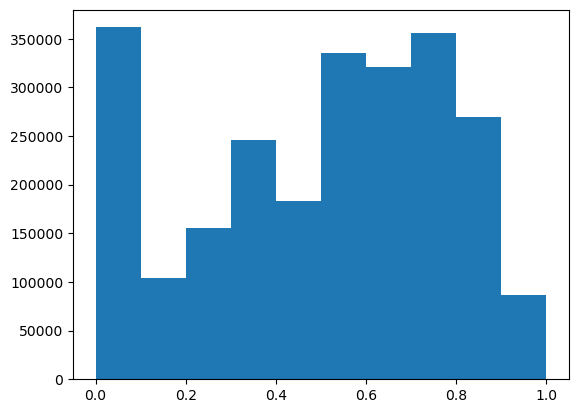

In [14]:
plt.hist(generality['generality_10yr_adjusted'])
plt.show()

In [12]:
generality['generality_10yr_adjusted'].quantile(0.9)

0.8484848484848483

In [30]:
high_generality = generality[generality['generality_10yr_adjusted']>generality['generality_10yr_adjusted'].quantile(0.9)]

In [31]:
vhigh_generality = generality[generality['generality_10yr_adjusted']>generality['generality_10yr_adjusted'].quantile(0.99)]

In [91]:
generality.columns

Index(['patent_id', 'patent_date', 'patent_title', 'num_claims', 'withdrawn',
       'bsim5', 'fsim01', 'fsim25', 'fsim610', 'lqsim05', 'lqsim010',
       'bk_p90_alqsim05', 'bk_p90_alqsim010', 'fcitALL', 'backward_citations',
       'cd_5', 'mcd_5', 'i_5', 'cd_10', 'mcd_10', 'i_10', 'cd_2017y',
       'mcd_2017y', 'i_2017y', 'permno', 'xi_nominal', 'xi_real', 'cites',
       'new_word', 'new_word_reuse', 'new_bigram', 'new_bigram_reuse',
       'new_trigram', 'new_trigram_reuse', 'new_word_comb',
       'new_word_comb_reuse', 'backward_cosine', 'forward_cosine',
       'filing_date', 'generality_10yr', 'citations_10yr', 'cpc_subclass',
       'filing_year', 'generality_10yr_adjusted', 'kelly_significant',
       'halloffame', 'at', 'prcc_f', 'csho', 'sale', 'emp', 'ppent', 'teq',
       '_merge'],
      dtype='object')

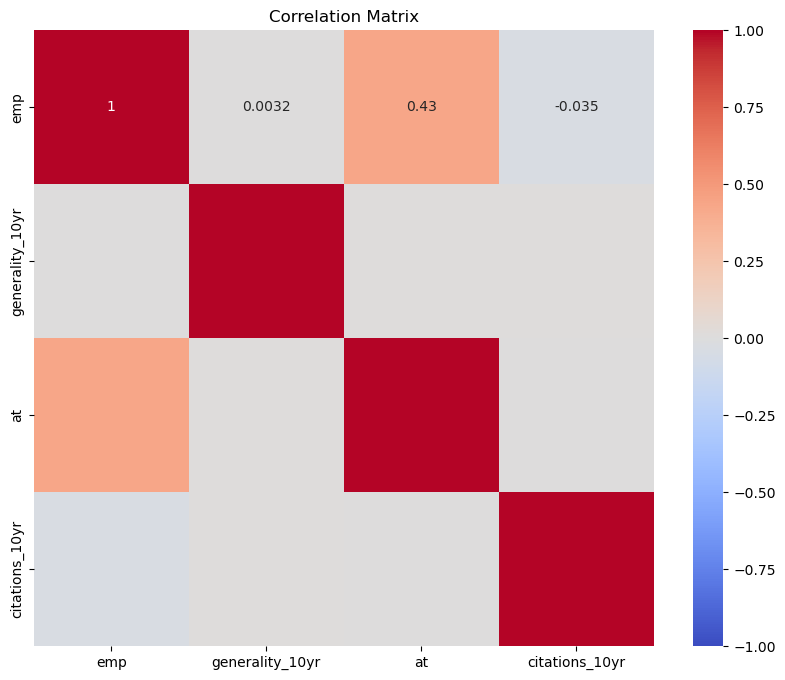

In [191]:
# Assuming you have a DataFrame called 'df' with numerical columns
correlation_matrix = generality[['emp','generality_10yr','at','citations_10yr']].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [160]:
generality[generality['_merge']=='left_only']['generality_10yr_adjusted'].mean()

0.5105500748447941

In [142]:
generality['generality_10yr_adjusted'].quantile()

0.50076045280826

In [145]:
generality['kelly_significant'] = generality['kelly_significant'].fillna(0)
generality['halloffame'] = generality['halloffame'].fillna(0)

/state/partition1/job-50211228/ipykernel_2776575/1380449581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generality['kelly_significant'] = generality['kelly_significant'].fillna(0)
/state/partition1/job-50211228/ipykernel_2776575/1380449581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generality['halloffame'] = generality['halloffame'].fillna(0)


In [164]:
high_generality['generality_10yr_adjusted'].median()

0.8999999999999999

In [167]:
vhigh_generality.groupby('_merge').patent_id.count()

/state/partition1/job-50211228/ipykernel_2776575/1358898497.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vhigh_generality.groupby('_merge').patent_id.count()


_merge
left_only     14833
right_only        0
both           6700
Name: patent_id, dtype: int64

In [168]:
14833/(14833+6700)

0.688849672595551

In [169]:
generality['at'].median()

16299.0

In [170]:
high_generality['at'].median()

14733.0

In [171]:
vhigh_generality['at'].median()

12659.65

In [196]:
column = 'teq'
print(generality[column].median())
print(high_generality[column].median())
print(vhigh_generality[column].median())

8728.0
7638.209
6792.15


In [176]:
generality['market_cap'] = generality['prcc_f']*generality['csho']

/state/partition1/job-50211228/ipykernel_2776575/3155037557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generality['market_cap'] = generality['prcc_f']*generality['csho']


In [8]:
import wrds
db = wrds.Connection(wrds_username='kl4898')


Loading library list...
Done


In [9]:
gvkey_list = date_permno_gvkey['gvkey']
gvkey_list = list(set([x for x in gvkey_list if not (isinstance(x, float) and math.isnan(x))]))
gvkey_string = '(' + ', '.join(map(str, gvkey_list)) + ')'

In [10]:
compustat_industry = db.raw_sql(f"""
    SELECT gvkey, fyear, naicsh, sich
    FROM comp_na_daily_all.funda
    WHERE gvkey::integer IN {gvkey_string}
""")

In [11]:
compustat_industry = compustat_industry.drop_duplicates(subset=['gvkey','fyear'])

In [21]:
date_permno_gvkey['fyear'].dtype

dtype('float64')

In [22]:
compustat_industry['fyear'].dtype

dtype('float64')

In [12]:
date_permno_gvkey['gvkey'].dtype

dtype('int64')

In [13]:
compustat_industry['gvkey'].dtype

dtype('O')

In [16]:
compustat_industry['gvkey'] = compustat_industry['gvkey'].astype(int)

In [19]:
compustat_industry

,gvkey,fyear,naicsh,sich
0,1000,1961.0,NaN,NaN
1,1000,1962.0,NaN,NaN
2,1000,1963.0,NaN,NaN
3,1000,1964.0,NaN,NaN
4,1000,1965.0,NaN,NaN
...,...,...,...,...
248140,296885,2019.0,325414.0,2836.0
248142,296885,2020.0,325414.0,2836.0
248144,296885,2021.0,325414.0,2836.0
248146,296885,2022.0,325414.0,2836.0


In [23]:
date_permno_gvkey = date_permno_gvkey.merge(compustat_industry, on=['gvkey','fyear'], how='left')

In [28]:
generality = generality.merge(date_permno_gvkey[['patent_id','gvkey','naicsh','sich']], on='patent_id',how='left')

In [49]:
patent_measures = patent_measures.merge(date_permno_gvkey[['patent_id','gvkey','naicsh','sich']], on='patent_id', how='left')
patent_measures

,patent_id,patent_date,patent_title,num_claims,withdrawn,bsim5,fsim01,fsim25,fsim610,lqsim05,...,prcc_f,csho,sale,emp,ppent,teq,_merge,gvkey,naicsh,sich
0,10000000,2018-06-19,Coherent LADAR using intra-pixel quadrature de...,20,0,16137348.0,3717139.0,13095141.0,NaN,NaN,...,124.53,299.000,23247.0,61.0,2005.0,10330.0,both,8972.0,334511.0,3812.0
1,10000001,2018-06-19,Injection molding machine and mold thickness c...,12,0,4491978.0,1061785.0,3338164.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN
2,10000002,2018-06-19,Method for manufacturing polymer film and co-e...,9,0,15684418.0,3809230.0,14191477.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN
3,10000003,2018-06-19,Method for producing a container from a thermo...,18,0,2376130.0,614547.0,2407175.0,NaN,NaN,...,36.76,282.059,12104.0,32.0,2215.0,4384.0,both,10519.0,336411.0,3721.0
4,10000004,2018-06-19,"Process of obtaining a double-oriented film, c...",6,0,6720278.0,1472208.0,4603263.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880572,9999995,2018-06-19,Method for producing molded article of fiber-r...,5,0,5235079.0,1293513.0,4756561.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN
7880573,9999996,2018-06-19,Polymer or polymer composite membrane having t...,9,0,4383319.0,1046825.0,3500406.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN
7880574,9999997,2018-06-19,Metal-plastic composite and method for produci...,18,0,12369872.0,2868309.0,6541563.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN
7880575,9999998,2018-06-19,Glass-resin laminate and method for producing ...,13,0,9630388.0,2188004.0,4873073.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN


In [50]:
with open('patent_measures_finance_0823.pkl','wb') as file:
    pickle.dump(patent_measures, file)

In [2]:
with open('patent_measures_finance_0823.pkl','rb') as file:
    patent_measures = pickle.load(file)

In [4]:
patent_measures.columns

Index(['patent_id', 'patent_date', 'patent_title', 'num_claims', 'withdrawn',
       'bsim5', 'fsim01', 'fsim25', 'fsim610', 'lqsim05', 'lqsim010',
       'bk_p90_alqsim05', 'bk_p90_alqsim010', 'fcitALL', 'backward_citations',
       'cd_5', 'mcd_5', 'i_5', 'cd_10', 'mcd_10', 'i_10', 'cd_2017y',
       'mcd_2017y', 'i_2017y', 'permno', 'xi_nominal', 'xi_real', 'cites',
       'new_word', 'new_word_reuse', 'new_bigram', 'new_bigram_reuse',
       'new_trigram', 'new_trigram_reuse', 'new_word_comb',
       'new_word_comb_reuse', 'backward_cosine', 'forward_cosine',
       'filing_date', 'generality_10yr', 'citations_10yr', 'cpc_subclass',
       'filing_year', 'generality_10yr_adjusted', 'kelly_significant',
       'halloffame', 'at', 'prcc_f', 'csho', 'sale', 'emp', 'ppent', 'teq',
       '_merge', 'gvkey', 'naicsh', 'sich'],
      dtype='object')

In [5]:
generality = patent_measures[patent_measures['generality_10yr_adjusted'].notna()]

In [21]:
print(len(patent_measures))
print(len(generality))
print(len(generality_10))

7880577
5275653
1261988


In [20]:
generality_10 = generality[generality['citations_10yr']>=10]

In [22]:
generality_10.groupby('cpc_subclass').generality_10yr_adjusted.mean()

cpc_subclass
A01B    0.517172
A01C    0.356972
A01D    0.371372
A01F    0.352632
A01G    0.543295
          ...   
H05H    0.594652
H05K    0.611716
H10B    0.503379
H10K    0.528658
H10N    0.642600
Name: generality_10yr_adjusted, Length: 628, dtype: float64

In [30]:
generality_10['cpc_section'] = generality_10['cpc_subclass'].str[:1]
generality_10['cpc_class'] = generality_10['cpc_subclass'].str[:3]

/state/partition1/job-50919294/ipykernel_3311748/1861401355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generality_10['cpc_section'] = generality_10['cpc_subclass'].str[:1]
/state/partition1/job-50919294/ipykernel_3311748/1861401355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generality_10['cpc_class'] = generality_10['cpc_subclass'].str[:3]


In [49]:
generality_10['generality_10yr_adjusted_norm'] = generality_10.groupby('cpc_subclass')['generality_10yr_adjusted'].transform(lambda x: (x - x.mean()) / x.std())

/state/partition1/job-50919294/ipykernel_3311748/2091306683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generality_10['generality_10yr_adjusted_norm'] = generality_10.groupby('cpc_subclass')['generality_10yr_adjusted'].transform(lambda x: (x - x.mean()) / x.std())


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H')])

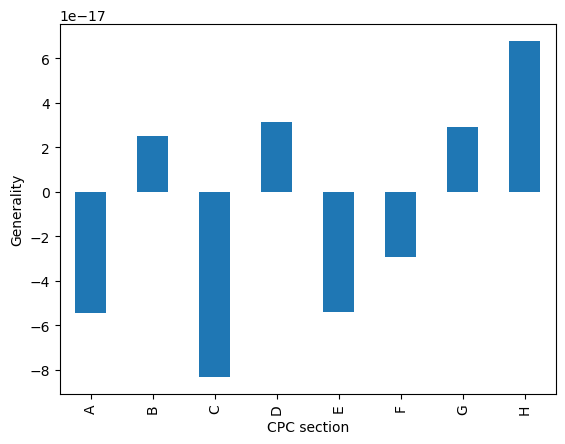

In [50]:
by_section = generality_10.groupby('cpc_section').generality_10yr_adjusted_norm.mean()
# plot generality by subclass
plt.figure()
by_section.plot(kind='bar')
plt.xlabel('CPC section')
plt.ylabel('Generality')
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'H01'),
  Text(1, 0, 'H02'),
  Text(2, 0, 'H03'),
  Text(3, 0, 'H04'),
  Text(4, 0, 'H05'),
  Text(5, 0, 'H10')])

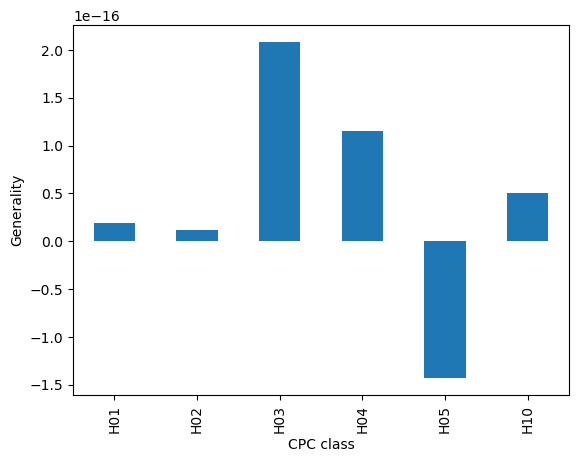

In [51]:
by_class = generality_10[generality_10['cpc_section']=='H'].groupby('cpc_class').generality_10yr_adjusted_norm.mean()
# plot generality by subclass
plt.figure()
by_class.plot(kind='bar')
plt.xlabel('CPC class')
plt.ylabel('Generality')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'H01B'),
  Text(1, 0, 'H01C'),
  Text(2, 0, 'H01F'),
  Text(3, 0, 'H01G'),
  Text(4, 0, 'H01H'),
  Text(5, 0, 'H01J'),
  Text(6, 0, 'H01K'),
  Text(7, 0, 'H01L'),
  Text(8, 0, 'H01M'),
  Text(9, 0, 'H01P'),
  Text(10, 0, 'H01Q'),
  Text(11, 0, 'H01R'),
  Text(12, 0, 'H01S'),
  Text(13, 0, 'H01T')])

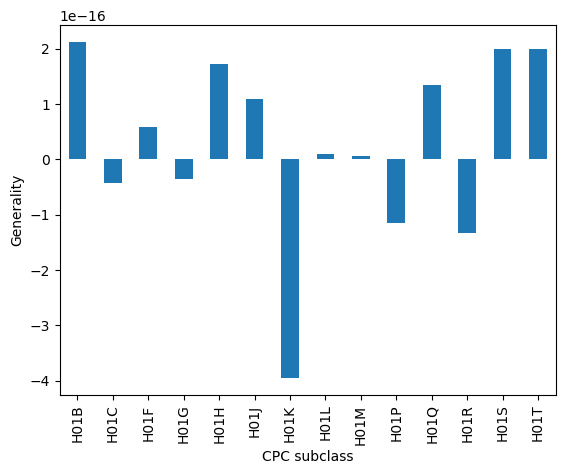

In [52]:
by_subclass = generality_10[generality_10['cpc_class']=='H01'].groupby('cpc_subclass').generality_10yr_adjusted_norm.mean()
# plot generality by subclass
plt.figure()
by_subclass.plot(kind='bar')
plt.xlabel('CPC subclass')
plt.ylabel('Generality')
plt.xticks(rotation=90)


Text(0, 0.5, 'Forward citation')

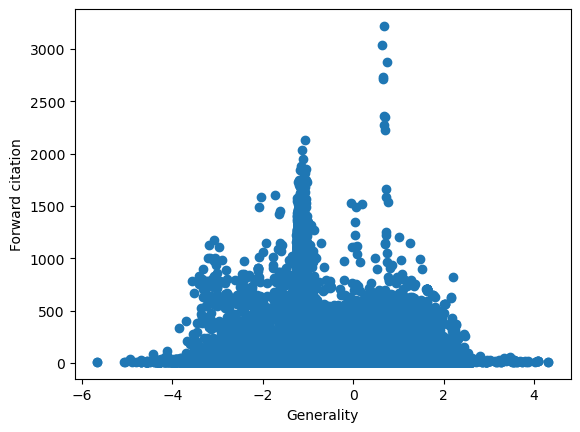

In [57]:
plt.figure()
plt.scatter(generality_10['generality_10yr_adjusted_norm'], generality_10['citations_10yr'])
plt.xlabel('Generality')
plt.ylabel('Forward citation')


In [58]:
generality.columns

Index(['patent_id', 'patent_date', 'patent_title', 'num_claims', 'withdrawn',
       'bsim5', 'fsim01', 'fsim25', 'fsim610', 'lqsim05', 'lqsim010',
       'bk_p90_alqsim05', 'bk_p90_alqsim010', 'fcitALL', 'backward_citations',
       'cd_5', 'mcd_5', 'i_5', 'cd_10', 'mcd_10', 'i_10', 'cd_2017y',
       'mcd_2017y', 'i_2017y', 'permno', 'xi_nominal', 'xi_real', 'cites',
       'new_word', 'new_word_reuse', 'new_bigram', 'new_bigram_reuse',
       'new_trigram', 'new_trigram_reuse', 'new_word_comb',
       'new_word_comb_reuse', 'backward_cosine', 'forward_cosine',
       'filing_date', 'generality_10yr', 'citations_10yr', 'cpc_subclass',
       'filing_year', 'generality_10yr_adjusted', 'kelly_significant',
       'halloffame', 'at', 'prcc_f', 'csho', 'sale', 'emp', 'ppent', 'teq',
       '_merge', 'gvkey', 'naicsh', 'sich'],
      dtype='object')

In [60]:
with zip.ZipFile('g_assignee_disambiguated.tsv.zip', 'r') as zip_ref:
    with zip_ref.open('g_assignee_disambiguated.tsv') as file:
        assignee = pd.read_csv(file, delimiter='\t')
with zip.ZipFile('g_location_disambiguated.tsv.zip', 'r') as zip_ref:
    with zip_ref.open('g_location_disambiguated.tsv') as file:
        location = pd.read_csv(file, delimiter='\t')

In [64]:
#8118751
assignee = assignee.merge(location[['location_id','disambig_state','disambig_country']], on='location_id', how='left')

In [197]:
assignee_summary.groupby('assignee_type')['generality_top10_subclass_mean'].mean().sort_values(ascending=False)

assignee_type
14.0    0.064286
0.0     0.056993
9.0     0.048387
4.0     0.030852
2.0     0.026392
5.0     0.020875
6.0     0.019524
3.0     0.010095
7.0     0.008993
12.0    0.005969
13.0    0.000000
Name: generality_top10_subclass_mean, dtype: float64

In [199]:
assignee_summary.groupby('disambig_country')['generality_top10_subclass_mean'].mean().sort_values(ascending=False)

disambig_country
VC    0.116279
LV    0.090909
PA    0.070588
GE    0.043478
GG    0.035714
        ...   
TH    0.000000
AG    0.000000
VN    0.000000
WS    0.000000
AF    0.000000
Name: generality_top10_subclass_mean, Length: 103, dtype: float64


In [207]:
countrycount = pd.DataFrame(assignee_summary.groupby('disambig_country')['assignee_id'].count()).reset_index()

In [217]:
countrylist = countrycount[countrycount['assignee_id']>=10]['disambig_country'].to_list()

In [220]:
assignee_summary[assignee_summary['disambig_country'].isin(countrylist)].groupby('disambig_country')['generality_top10_subclass_mean'].mean().sort_values(ascending=False)

disambig_country
VG    0.032164
US    0.026689
BB    0.026536
IL    0.022129
SS    0.020942
CA    0.019048
NZ    0.017905
AU    0.017701
BS    0.014572
GB    0.014217
BM    0.013967
FI    0.012557
IE    0.012093
CY    0.011905
JP    0.011867
SG    0.010763
AE    0.010643
LI    0.010342
NL    0.010064
LU    0.009885
MY    0.009860
SE    0.009782
AT    0.009775
BE    0.009675
NO    0.009668
CH    0.008735
ES    0.007908
DE    0.007827
FR    0.007706
DK    0.007510
ZA    0.007254
TW    0.007153
KY    0.006819
TR    0.006614
IT    0.005742
MX    0.005376
HU    0.004629
KR    0.004400
PL    0.003244
CZ    0.002773
SA    0.001930
BR    0.001753
CN    0.001733
IN    0.001600
MT    0.000000
RU    0.000000
PT    0.000000
SI    0.000000
Name: generality_top10_subclass_mean, dtype: float64

In [73]:
assignee['patent_id'] = pd.to_numeric(assignee['patent_id'], errors='coerce')

In [75]:
assignee = assignee.dropna(subset=['patent_id'])

In [77]:
assignee['patent_id'] = assignee['patent_id'].astype(int)

/state/partition1/job-50919294/ipykernel_3311748/2436628681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assignee['patent_id'] = assignee['patent_id'].astype(int)


In [78]:
patent_measures_assignee = patent_measures.merge(assignee, on='patent_id',how='left')

In [79]:
with open('patent_measures_assignee.pkl','wb') as file:
    pickle.dump(patent_measures_assignee, file)

In [82]:
assignee_patent_count = patent_measures_assignee.groupby('assignee_id').patent_id.count()

In [86]:
assignee_patent_count = pd.DataFrame(assignee_patent_count).reset_index()

In [88]:
assignee_patent_count[assignee_patent_count['patent_id']>=10]

,assignee_id,patent_id
1,0000d082-766b-4f70-97e4-636113169770,14
10,00024740-896b-47f8-a0d2-165d248831c3,11
14,00031aff-7b3a-4316-af47-d29c7ca562b7,13
41,0006f923-87bb-4f61-a49e-3afbc40a4935,89
52,0008bbd7-f4a8-43a9-bf4f-bd21ae7d51a8,83
...,...,...
484198,fffa0e45-fff4-480e-a734-0d9e0b3a5f7c,25
484205,fffaa15c-3e04-4973-a04b-0736ee65b44f,13
484212,fffb946b-74d7-4bf1-bbc4-28485cefe9b0,16
484216,fffc240b-f946-43b8-b44b-ace81051bbdb,51


In [91]:
generality_10.groupby('cpc_subclass')['generality_10yr_adjusted_norm'].quantile(0.9)

cpc_subclass
A01B    1.206972
A01C    1.428335
A01D    1.377765
A01F    1.387636
A01G    1.213185
          ...   
H05H    1.273301
H05K    1.128427
H10B    1.129857
H10K    1.200423
H10N    1.093407
Name: generality_10yr_adjusted_norm, Length: 628, dtype: float64

In [93]:
print(len(generality_10))

1261988


In [94]:
generality_10['generality_10yr_adjusted_norm'].quantile(0.9)

1.1960630215982389

In [98]:
generality_10.columns

Index(['patent_id', 'patent_date', 'patent_title', 'num_claims', 'withdrawn',
       'bsim5', 'fsim01', 'fsim25', 'fsim610', 'lqsim05', 'lqsim010',
       'bk_p90_alqsim05', 'bk_p90_alqsim010', 'fcitALL', 'backward_citations',
       'cd_5', 'mcd_5', 'i_5', 'cd_10', 'mcd_10', 'i_10', 'cd_2017y',
       'mcd_2017y', 'i_2017y', 'permno', 'xi_nominal', 'xi_real', 'cites',
       'new_word', 'new_word_reuse', 'new_bigram', 'new_bigram_reuse',
       'new_trigram', 'new_trigram_reuse', 'new_word_comb',
       'new_word_comb_reuse', 'backward_cosine', 'forward_cosine',
       'filing_date', 'generality_10yr', 'citations_10yr', 'cpc_subclass',
       'filing_year', 'generality_10yr_adjusted', 'kelly_significant',
       'halloffame', 'at', 'prcc_f', 'csho', 'sale', 'emp', 'ppent', 'teq',
       '_merge', 'gvkey', 'naicsh', 'sich', 'cpc_section', 'cpc_class',
       'generality_10yr_adjusted_norm', 'top10_generality'],
      dtype='object')

In [99]:
generality_10 = generality_10[['patent_id','generality_10yr_adjusted','cpc_subclass']]

In [100]:
generality_10['generality_top10'] = generality_10['generality_10yr_adjusted']>generality_10['generality_10yr_adjusted'].quantile(0.9)

/state/partition1/job-50919294/ipykernel_3311748/3029295621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generality_10['generality_top10'] = generality_10['generality_10yr_adjusted']>generality_10['generality_10yr_adjusted'].quantile(0.9)


In [101]:
generality_10['generality_top10_subclass'] = generality_10.groupby('cpc_subclass')['generality_10yr_adjusted'].transform(lambda x: x > x.quantile(0.9))

/state/partition1/job-50919294/ipykernel_3311748/1105843178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generality_10['generality_top10_subclass'] = generality_10.groupby('cpc_subclass')['generality_10yr_adjusted'].transform(lambda x: x > x.quantile(0.9))


In [102]:
generality_10

,patent_id,generality_10yr_adjusted,cpc_subclass,generality_top10,generality_top10_subclass
0,10000000,0.600000,G01S,False,False
21,10000023,0.303030,B29C,False,False
119,10000122,0.350769,B60L,False,False
149,10000152,0.720588,B60Q,False,False
230,10000234,0.355556,B62D,False,False
...,...,...,...,...,...
7880412,9999834,0.664516,H04N,False,False
7880499,9999922,0.361905,B22F,False,False
7880501,9999924,0.547619,B29C,False,False
7880548,9999971,0.000000,B25H,False,False


In [103]:
patent_measures_assignee = patent_measures_assignee.merge(generality_10[['patent_id','generality_top10','generality_top10_subclass']], on='patent_id', how='left')

In [106]:
patent_measures_assignee['generality_top10'] = patent_measures_assignee['generality_top10'].fillna(False).astype(int)

In [107]:
patent_measures_assignee['generality_top10_subclass'] = patent_measures_assignee['generality_top10_subclass'].fillna(False).astype(int)

In [126]:
assignee_summary = patent_measures_assignee.groupby('assignee_id').agg({'patent_id':'count','citations_10yr':['mean','median'],'generality_10yr_adjusted':['mean','median'],'generality_top10':['sum','mean'],'generality_top10_subclass':['sum','mean'],'cpc_subclass':lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA})

In [127]:
assignee_summary = assignee_summary.reset_index()

In [121]:
assignee_summary[assignee_summary['patent_id']['count']>=10]

assignee_id patent_id citations_10yr         \
                                                 count           mean median   
1       0000d082-766b-4f70-97e4-636113169770        14       8.875000    3.0   
10      00024740-896b-47f8-a0d2-165d248831c3        11       3.454545    3.0   
14      00031aff-7b3a-4316-af47-d29c7ca562b7        13       3.888889    2.0   
41      0006f923-87bb-4f61-a49e-3afbc40a4935        89      22.957746   10.0   
52      0008bbd7-f4a8-43a9-bf4f-bd21ae7d51a8        83      13.157895   10.0   
...                                      ...       ...            ...    ...   
484198  fffa0e45-fff4-480e-a734-0d9e0b3a5f7c        25       8.173913    6.0   
484205  fffaa15c-3e04-4973-a04b-0736ee65b44f        13       7.444444    6.0   
484212  fffb946b-74d7-4bf1-bbc4-28485cefe9b0        16      29.687500   22.5   
484216  fffc240b-f946-43b8-b44b-ace81051bbdb        51       2.222222    1.0   
484231  fffe6936-0016-4306-b13d-0acfca1d2a34        10       9.375000    9.0   

       generality_10yr_adjusted           generality_top10            \
                           mean    median              sum      mean   
1                      0.140374  0.000000                0  0.000000   
10                     0.539394  0.666667                0  0.000000   
14                     0.040668  0.000000                0  0.000000   
41                     0.126566  0.000000                0  0.000000   
52                     0.448778  0.490476                2  0.024096   
...                         ...       ...              ...       ...   
484198                 0.324540  0.400000                0  0.000000   
484205                 0.583179  0.679487                1  0.076923   
484212                 0.719249  0.718081                3  0.187500   
484216                 0.145062  0.000000                0  0.000000   
484231                 0.218601  0.128571                0  0.000000   

       generality_top10_subclass           cpc_subclass  
                             sum      mean     <lambda>  
1                              0  0.000000         A61K  
10                             0  0.000000         B65H  
14                             0  0.000000         A61K  
41                             0  0.000000         A61F  
52                             2  0.024096         G01N  
...                          ...       ...          ...  
484198                         0  0.000000         A43B  
484205                         1  0.076923         H04M  
484212                         3  0.187500         G05B  
484216                         1  0.019608         H04L  
484231                         0  0.000000         A61B  

[49918 rows x 11 columns]

In [122]:
def flatten_multiindex(df):
    df.columns = ['_'.join(col).strip() for col in df.columns.values]
    return df

In [128]:
assignee_summary = flatten_multiindex(assignee_summary)

In [131]:
assignee_summary[assignee_summary['patent_id_count']>=10].sort_values('generality_top10_mean',ascending=False)

,assignee_id_,patent_id_count,citations_10yr_mean,citations_10yr_median,generality_10yr_adjusted_mean,generality_10yr_adjusted_median,generality_top10_sum,generality_top10_mean,generality_top10_subclass_sum,generality_top10_subclass_mean,cpc_subclass_<lambda>
70902,258a20fa-7255-40c4-8dca-556c258372c8,10,16.800000,16.5,0.861999,0.848605,10,1.000000,10,1.000000,G03F
123003,4102b0c4-832d-4455-b9b0-fdf5d6b2b0b1,12,57.500000,57.5,0.886411,0.887838,12,1.000000,12,1.000000,G01N
101990,36046be6-9c86-4141-af22-abd72be08eb5,17,127.588235,100.0,0.882659,0.893737,15,0.882353,13,0.764706,G06Q
65094,22745286-0a5f-4142-a5dc-e3f67b90d67b,26,68.720000,57.0,0.856574,0.871380,22,0.846154,16,0.615385,G05F
21302,0b471e73-6365-4289-8553-6193ac6398ca,26,17.384615,14.5,0.889828,0.892298,22,0.846154,17,0.653846,B41M
...,...,...,...,...,...,...,...,...,...,...,...
230686,7a1b3637-c99f-4fe0-ab42-6530b60161b0,11,3.444444,3.0,0.388889,0.533333,0,0.000000,0,0.000000,F02G
230702,7a1de061-2d92-4def-b13d-a40fd5e87043,26,8.285714,4.0,0.324020,0.153846,0,0.000000,0,0.000000,G06Q
230713,7a1fd8f6-5a80-4934-8bdb-4800370acfce,35,3.384615,2.0,0.558375,0.700000,0,0.000000,0,0.000000,C08K
230714,7a202d5e-3dd6-43d6-8e72-eff0c9c8481d,10,2.000000,1.0,0.250000,0.000000,0,0.000000,0,0.000000,C22B


In [133]:
assignee.columns

Index(['patent_id', 'assignee_sequence', 'assignee_id',
       'disambig_assignee_individual_name_first',
       'disambig_assignee_individual_name_last',
       'disambig_assignee_organization', 'assignee_type', 'location_id',
       'disambig_state', 'disambig_country'],
      dtype='object')

In [134]:
assignee_info = assignee[['assignee_id',
       'disambig_assignee_individual_name_first',
       'disambig_assignee_individual_name_last',
       'disambig_assignee_organization', 'assignee_type', 'location_id',
       'disambig_state', 'disambig_country']].drop_duplicates()

In [143]:
assignee_info = assignee_info.drop_duplicates('assignee_id')

In [147]:
assignee_summary = assignee_summary.rename(columns={'assignee_id_':'assignee_id','cpc_subclass_<lambda>':'cpc_subclass'})

In [148]:
assignee_summary = assignee_summary.merge(assignee_info, on='assignee_id', how='left')

In [150]:
with open('assignee_summary.pkl','wb') as file:
    pickle.dump(assignee_summary, file)

In [157]:
df = assignee_summary[assignee_summary['patent_id_count']>=10]

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [159]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values in critical columns (if any)
df = df.dropna(subset=['generality_10yr_adjusted_mean', 'assignee_type', 'disambig_country'])

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)


assignee_id                                    0
patent_id_count                                0
citations_10yr_mean                          401
citations_10yr_median                        401
generality_10yr_adjusted_mean                401
generality_10yr_adjusted_median              401
generality_top10_sum                           0
generality_top10_mean                          0
generality_top10_subclass_sum                  0
generality_top10_subclass_mean                 0
cpc_subclass                                 401
disambig_assignee_individual_name_first    49529
disambig_assignee_individual_name_last     49529
disambig_assignee_organization               375
assignee_type                                271
location_id                                  653
disambig_state                             21667
disambig_country                             653
dtype: int64


In [161]:
# Calculate the threshold for high-generality assignees (e.g., top 25%)
threshold = df['generality_10yr_adjusted_mean'].quantile(0.75)

# Create a binary variable 'high_generality_assignee'
df['high_generality_assignee'] = np.where(df['generality_10yr_adjusted_mean'] >= threshold, 1, 0)

# Display the distribution
print(df['high_generality_assignee'].value_counts())

high_generality_assignee
0    36453
1    12151
Name: count, dtype: int64


       patent_id_count  citations_10yr_mean  citations_10yr_median  \
count     48604.000000         48604.000000           48604.000000   
mean        132.723274             8.790201               5.850136   
std        1461.645475            12.752430              10.066960   
min          10.000000             1.000000               1.000000   
25%          13.000000             3.428571               2.000000   
50%          21.000000             5.571429               3.500000   
75%          47.000000             9.416667               6.000000   
max      158515.000000           371.746208             373.000000   

       generality_10yr_adjusted_mean  generality_10yr_adjusted_median  \
count                   48604.000000                     48604.000000   
mean                        0.371352                         0.331306   
std                         0.190248                         0.295711   
min                         0.000000                         0.000000   
25% 

/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


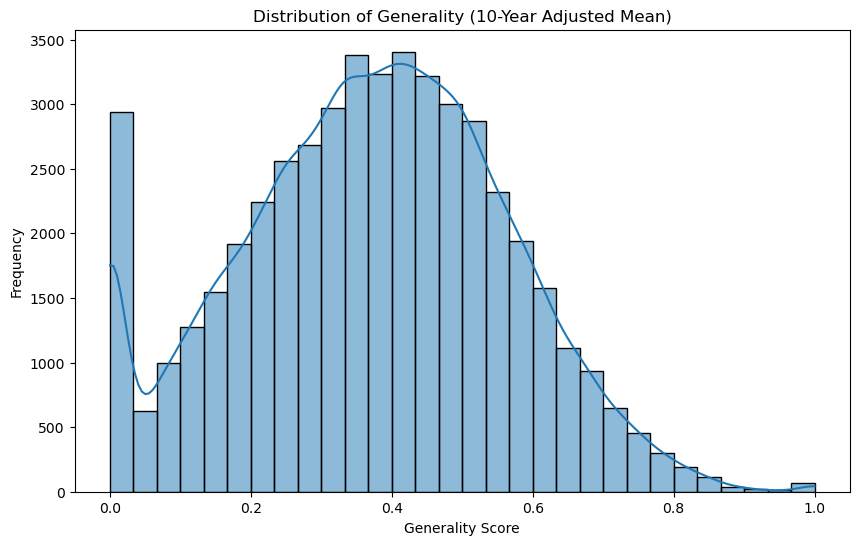

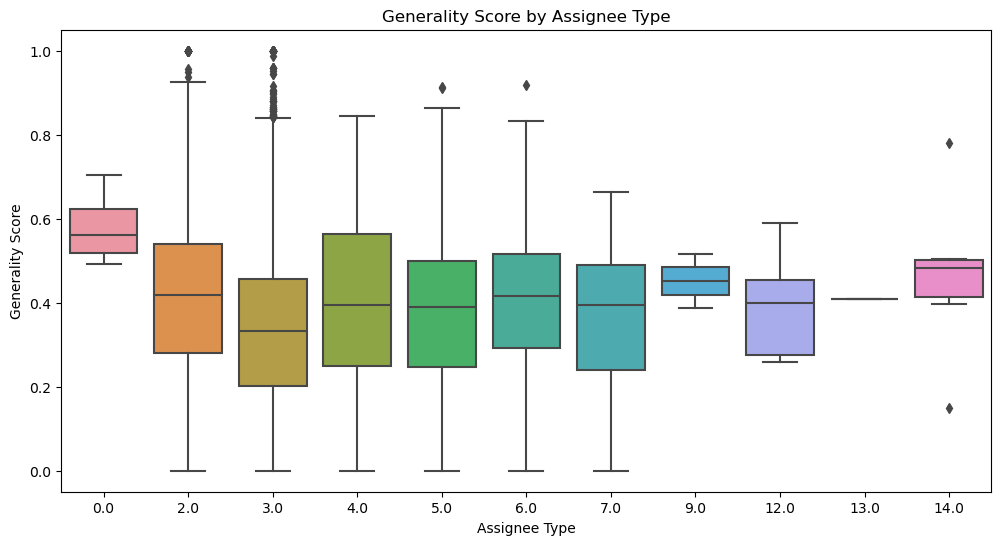

In [162]:
# Summary statistics
print(df.describe())

# Visualize the distribution of 'generality_10yr_adjusted_mean'
plt.figure(figsize=(10, 6))
sns.histplot(df['generality_10yr_adjusted_mean'], bins=30, kde=True)
plt.title('Distribution of Generality (10-Year Adjusted Mean)')
plt.xlabel('Generality Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot of generality by assignee type
plt.figure(figsize=(12, 6))
sns.boxplot(x='assignee_type', y='generality_10yr_adjusted_mean', data=df)
plt.title('Generality Score by Assignee Type')
plt.xlabel('Assignee Type')
plt.ylabel('Generality Score')
plt.show()


In [ ]:
# 01 Unassigned
# 02 United States company or corporation
# 03 Foreign company or corporation
# 04 United States individual
# 05 Foreign individual
# 06 U.S. Federal government
# 07 Foreign government
# 08 U.S. county government
# 09 U.S. state government

In [163]:
df

,assignee_id,patent_id_count,citations_10yr_mean,citations_10yr_median,generality_10yr_adjusted_mean,generality_10yr_adjusted_median,generality_top10_sum,generality_top10_mean,generality_top10_subclass_sum,generality_top10_subclass_mean,cpc_subclass,disambig_assignee_individual_name_first,disambig_assignee_individual_name_last,disambig_assignee_organization,assignee_type,location_id,disambig_state,disambig_country,high_generality_assignee
0,0000d082-766b-4f70-97e4-636113169770,14,8.875000,3.0,0.140374,0.000000,0,0.000000,0,0.000000,A61K,NaN,NaN,Medgenics Medical Israel Ltd.,3.0,50ae7c9f-16c8-11ed-9b5f-1234bde3cd05,NaN,IL,0
1,00024740-896b-47f8-a0d2-165d248831c3,11,3.454545,3.0,0.539394,0.666667,0,0.000000,0,0.000000,B65H,NaN,NaN,Murao Boki Kabushiki Kaisha,3.0,5ce923b4-16c8-11ed-9b5f-1234bde3cd05,NaN,JP,1
2,00031aff-7b3a-4316-af47-d29c7ca562b7,13,3.888889,2.0,0.040668,0.000000,0,0.000000,0,0.000000,A61K,NaN,NaN,OLATEC INDUSTRIES LLC,2.0,92237ca2-16c8-11ed-9b5f-1234bde3cd05,NY,US,0
3,0006f923-87bb-4f61-a49e-3afbc40a4935,89,22.957746,10.0,0.126566,0.000000,0,0.000000,0,0.000000,A61F,NaN,NaN,"Apollo Endosurgery, Inc.",2.0,1811f8b9-16c8-11ed-9b5f-1234bde3cd05,TX,US,0
4,0008bbd7-f4a8-43a9-bf4f-bd21ae7d51a8,83,13.157895,10.0,0.448778,0.490476,2,0.024096,2,0.024096,G01N,NaN,NaN,Quidel Corporation,2.0,1893009c-16c8-11ed-9b5f-1234bde3cd05,CA,US,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48599,fff85c1f-7506-4032-996e-0d38a3ce8d3c,11,3.333333,2.0,0.240741,0.000000,0,0.000000,0,0.000000,B60T,NaN,NaN,FAG Kugelfischer Georg Schafer Kommanditgesell...,3.0,280c9de4-16c8-11ed-9b5f-1234bde3cd05,NaN,DE,0
48600,fffa0e45-fff4-480e-a734-0d9e0b3a5f7c,25,8.173913,6.0,0.324540,0.400000,0,0.000000,0,0.000000,A43B,NaN,NaN,"K-SWISS, INC.",2.0,c6a5b57c-16c7-11ed-9b5f-1234bde3cd05,CA,US,0
48601,fffaa15c-3e04-4973-a04b-0736ee65b44f,13,7.444444,6.0,0.583179,0.679487,1,0.076923,1,0.076923,H04M,NaN,NaN,"KoamTac, Inc.",2.0,08356fad-16c8-11ed-9b5f-1234bde3cd05,NJ,US,1
48602,fffc240b-f946-43b8-b44b-ace81051bbdb,51,2.222222,1.0,0.145062,0.000000,0,0.000000,1,0.019608,H04L,NaN,NaN,"Orion Labs, Inc.",2.0,4affd925-16c8-11ed-9b5f-1234bde3cd05,CA,US,0


In [165]:
# Encode categorical variables using LabelEncoder or One-Hot Encoding
# For simplicity, let's use LabelEncoder for 'assignee_type' and 'disambig_country'

label_encoder = LabelEncoder()

# Encode 'assignee_type'
df['assignee_type_encoded'] = label_encoder.fit_transform(df['assignee_type'])

# Encode 'disambig_country'
df['disambig_country_encoded'] = label_encoder.fit_transform(df['disambig_country'])

# Select features for the model
feature_cols = ['patent_id_count', 'citations_10yr_mean', 'assignee_type_encoded', 'disambig_country_encoded']

# Define X and y
X = df[feature_cols]
y = df['high_generality_assignee']


In [166]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [167]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)


              precision    recall  f1-score   support

           0       0.75      0.99      0.85      7239
           1       0.54      0.05      0.08      2482

    accuracy                           0.75      9721
   macro avg       0.64      0.52      0.47      9721
weighted avg       0.70      0.75      0.66      9721



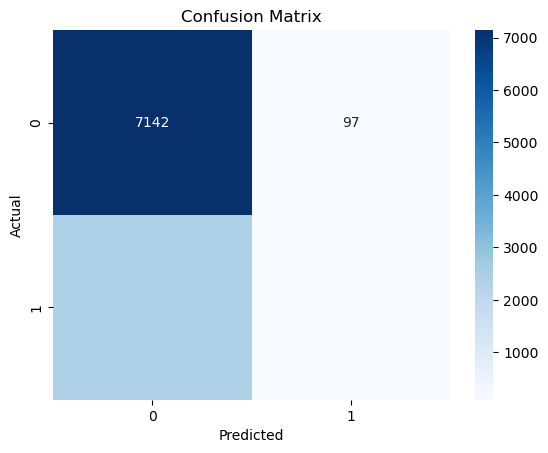

In [168]:
# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [169]:
# Retrieve the coefficients and their corresponding feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

print(coefficients)


                    Feature  Coefficient
0           patent_id_count    -0.001574
1       citations_10yr_mean     0.026178
2     assignee_type_encoded    -0.249989
3  disambig_country_encoded     0.006500


In [170]:
# Add a constant term for the intercept
X2 = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X2)
result = logit_model.fit()

# Summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.535183
         Iterations 9
                              Logit Regression Results                              
Dep. Variable:     high_generality_assignee   No. Observations:                48604
Model:                                Logit   Df Residuals:                    48599
Method:                                 MLE   Df Model:                            4
Date:                      Fri, 13 Sep 2024   Pseudo R-squ.:                 0.04828
Time:                              00:51:57   Log-Likelihood:                -26012.
converged:                             True   LL-Null:                       -27332.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.4

In [171]:
df = assignee_summary[assignee_summary['patent_id_count']>=10]

In [172]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values in critical columns
df = df.dropna(subset=['generality_top10_mean', 'assignee_type', 'disambig_country'])

# Reset the index
df.reset_index(drop=True, inplace=True)


assignee_id                                    0
patent_id_count                                0
citations_10yr_mean                          401
citations_10yr_median                        401
generality_10yr_adjusted_mean                401
generality_10yr_adjusted_median              401
generality_top10_sum                           0
generality_top10_mean                          0
generality_top10_subclass_sum                  0
generality_top10_subclass_mean                 0
cpc_subclass                                 401
disambig_assignee_individual_name_first    49529
disambig_assignee_individual_name_last     49529
disambig_assignee_organization               375
assignee_type                                271
location_id                                  653
disambig_state                             21667
disambig_country                             653
dtype: int64


count    48996.000000
mean         0.019262
std          0.053318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.009524
max          1.000000
Name: generality_top10_mean, dtype: float64


/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


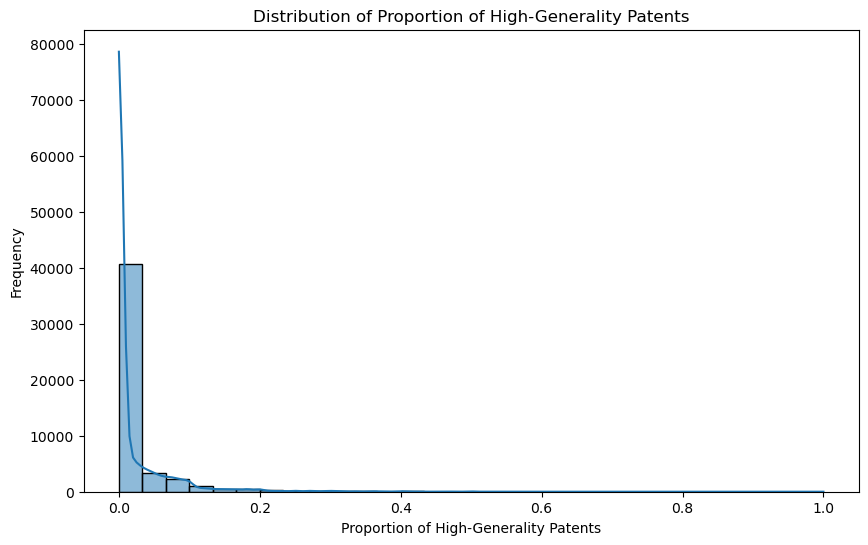

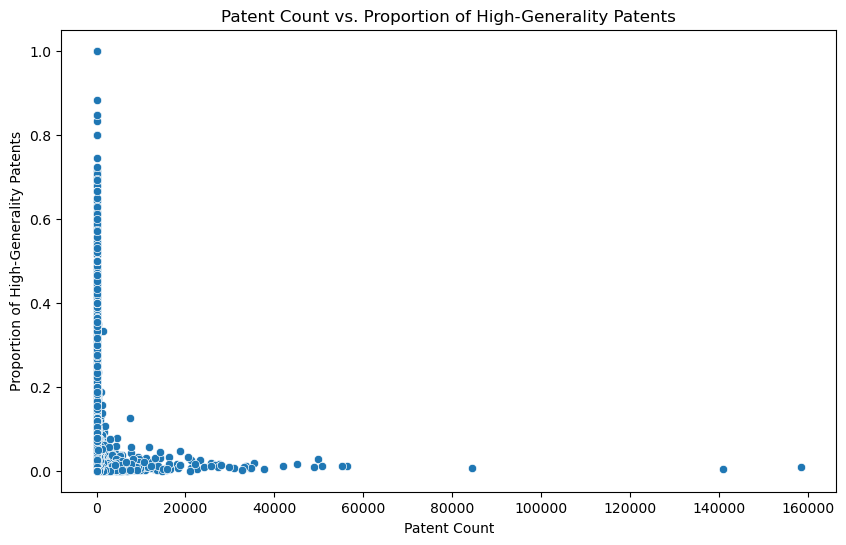

In [173]:
# Summary statistics of 'generality_top10_mean'
print(df['generality_top10_mean'].describe())

# Visualize the distribution of 'generality_top10_mean'
plt.figure(figsize=(10, 6))
sns.histplot(df['generality_top10_mean'], bins=30, kde=True)
plt.title('Distribution of Proportion of High-Generality Patents')
plt.xlabel('Proportion of High-Generality Patents')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of 'patent_id_count' vs. 'generality_top10_mean'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='patent_id_count', y='generality_top10_mean', data=df)
plt.title('Patent Count vs. Proportion of High-Generality Patents')
plt.xlabel('Patent Count')
plt.ylabel('Proportion of High-Generality Patents')
plt.show()


In [174]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Encode 'assignee_type'
df['assignee_type_encoded'] = label_encoder.fit_transform(df['assignee_type'])

# Encode 'disambig_country'
df['disambig_country_encoded'] = label_encoder.fit_transform(df['disambig_country'])

# Features for the model
feature_cols = [
    'patent_id_count',
    'citations_10yr_mean',
    'assignee_type_encoded',
    'disambig_country_encoded'
]

# Define X and y
X = df[feature_cols]
y = df['generality_top10_mean']


In [176]:
# Check for zeros or ones in 'generality_top10_mean'
print(f"Number of zeros in y: {(y == 0).sum()}")
print(f"Number of ones in y: {(y == 1).sum()}")

# Adjust zeros and ones slightly to fit the (0,1) interval if necessary
epsilon = 1e-4  # Small constant

y = y.clip(epsilon, 1 - epsilon)


Number of zeros in y: 35092
Number of ones in y: 2


In [179]:
# For statistical modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder

In [180]:
# Logit transformation of y
df_model['logit_y'] = np.log(y / (1 - y))

# Define the formula
formula_ols = 'logit_y ~ patent_id_count + citations_10yr_mean + C(assignee_type_encoded) + C(disambig_country_encoded)'

# Fit the OLS model
ols_model = smf.ols(formula=formula_ols, data=df_model)
ols_results = ols_model.fit()

# Summary of the model
print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:                logit_y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     26.53
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:54:53   Log-Likelihood:            -1.1761e+05
No. Observations:               48604   AIC:                         2.355e+05
Df Residuals:                   48489   BIC:                         2.365e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [195]:
#13(BS) 51(JP) 57(LI) 62(LV) 87(SS) 96(US) 97(VC)
df[df['disambig_country_encoded']==13]

,assignee_id,patent_id_count,citations_10yr_mean,citations_10yr_median,generality_10yr_adjusted_mean,generality_10yr_adjusted_median,generality_top10_sum,generality_top10_mean,generality_top10_subclass_sum,generality_top10_subclass_mean,cpc_subclass,disambig_assignee_individual_name_first,disambig_assignee_individual_name_last,disambig_assignee_organization,assignee_type,location_id,disambig_state,disambig_country,assignee_type_encoded,disambig_country_encoded
265,01698b99-8831-4dc0-bed5-93f2d732890f,122,22.591667,16.0,0.339867,0.381115,2,0.016393,1,0.008197,A47L,NaN,NaN,G.B.D. CORP.,3.0,b5e3454f-16c7-11ed-9b5f-1234bde3cd05,NaN,BS,2,13
6242,1fd39b9a-20f7-483d-8283-b4017e6f6b7b,10,22.400000,16.0,0.621539,0.556434,1,0.100000,1,0.100000,G06F,NaN,NaN,Commodore Electronics Limited,2.0,b5e3454f-16c7-11ed-9b5f-1234bde3cd05,NaN,BS,1,13
7836,285d8163-5697-49a0-b065-9d06d7764acf,11,6.200000,6.0,0.410171,0.516667,1,0.090909,0,0.000000,B25H,NaN,NaN,"Global Industries, Incorporated",2.0,b5e3454f-16c7-11ed-9b5f-1234bde3cd05,NaN,BS,1,13
16178,53b1dd8b-5319-439b-9cd2-75dcea2cba4c,12,5.818182,3.0,0.567663,0.666667,0,0.000000,0,0.000000,C04B,NaN,NaN,Indoor Technologies LTD,3.0,b5e3454f-16c7-11ed-9b5f-1234bde3cd05,NaN,BS,2,13
18035,5da1f457-3dcc-422a-b566-3b1eaf8e3ddc,13,2.833333,2.0,0.066667,0.000000,0,0.000000,0,0.000000,C07D,NaN,NaN,Hutchison MediPharma Enterprises Limited,3.0,b5e3454f-16c7-11ed-9b5f-1234bde3cd05,NaN,BS,2,13
19138,6383a6bf-7a67-40cd-84b4-da3d9a65fe9b,12,NaN,NaN,NaN,NaN,0,0.000000,0,0.000000,<NA>,NaN,NaN,Roivios Limited,3.0,b5e3454f-16c7-11ed-9b5f-1234bde3cd05,NaN,BS,2,13
21347,6f08446d-fb58-4481-b022-3e84192dedac,15,29.266667,22.0,0.597194,0.666667,1,0.066667,1,0.066667,H04L,NaN,NaN,Vidiator Enterprises Inc.,3.0,b5e3454f-16c7-11ed-9b5f-1234bde3cd05,NaN,BS,2,13
30698,a02fc3c5-4bbe-4766-a46e-0ec526089a18,10,3.444444,3.0,0.361111,0.250000,0,0.000000,0,0.000000,B07C,NaN,NaN,Sphere Investments Limited,3.0,b5e3454f-16c7-11ed-9b5f-1234bde3cd05,NaN,BS,2,13
32233,a86d3c37-1459-49f1-bb37-a5daa45942a0,13,2.375000,1.0,0.247024,0.000000,0,0.000000,0,0.000000,B32B,NaN,NaN,Intelligent Engineering (Bahamas) Limited,3.0,b5e3454f-16c7-11ed-9b5f-1234bde3cd05,NaN,BS,2,13
36847,c0ad58b1-ac14-4674-a757-48819ef2966e,27,7.045455,4.5,0.532562,0.652778,1,0.037037,0,0.000000,G01N,NaN,NaN,"Xtralis Technologies, Ltd.",3.0,b5e3454f-16c7-11ed-9b5f-1234bde3cd05,NaN,BS,2,13


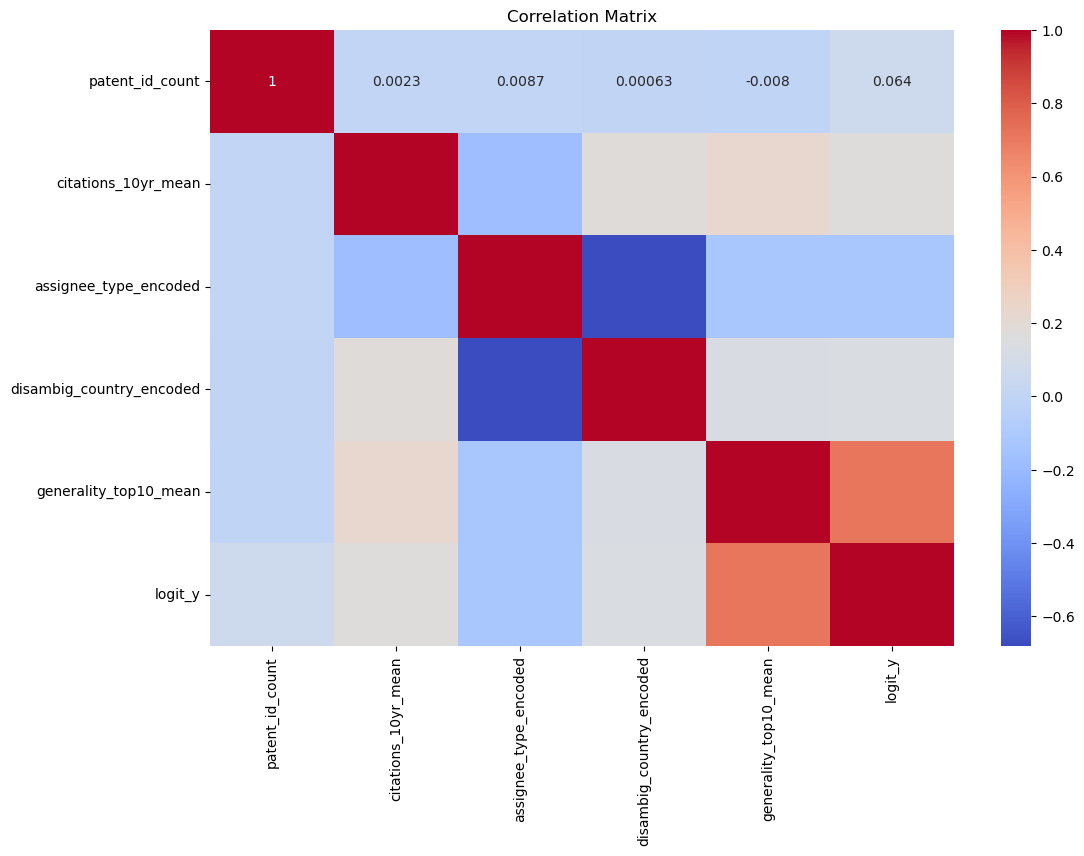

In [182]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [230]:
patent_measures_assignee_10 = patent_measures_assignee[patent_measures_assignee['citations_10yr']>=10]

In [280]:
patent_measures_assignee_10['mkvalt'] = patent_measures_assignee_10['prcc_f'] * patent_measures_assignee_10['csho']

/state/partition1/job-50919294/ipykernel_3311748/2627001918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patent_measures_assignee_10['mkvalt'] = patent_measures_assignee_10['prcc_f'] * patent_measures_assignee_10['csho']


In [281]:
top10 = patent_measures_assignee_10[patent_measures_assignee_10['generality_top10']==1]
bottom90 = patent_measures_assignee_10[patent_measures_assignee_10['generality_top10']==0]
top10_subclass = patent_measures_assignee_10[patent_measures_assignee_10['generality_top10_subclass']==1]
bottom90_subclass = patent_measures_assignee_10[patent_measures_assignee_10['generality_top10_subclass']==0]

/state/partition1/job-50919294/ipykernel_3311748/1035030202.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(top10_subclass['generality_10yr_adjusted'], bins=100, kde=False, label='Top 10%')


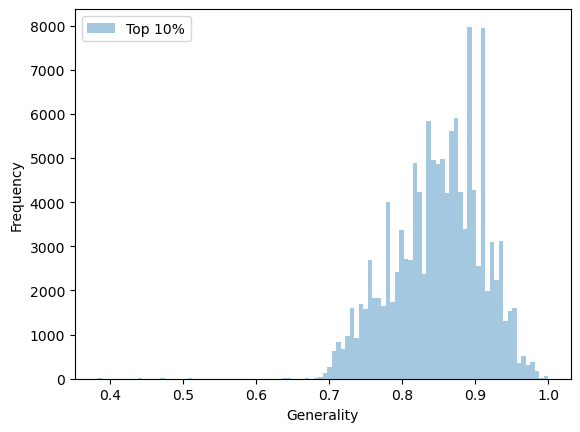

In [235]:
plt.figure()
sns.distplot(top10_subclass['generality_10yr_adjusted'], bins=100, kde=False, label='Top 10%')
plt.xlabel('Generality')
plt.ylabel('Frequency')
plt.legend()

/state/partition1/job-50919294/ipykernel_3311748/1255415149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bottom90_subclass['generality_10yr_adjusted'], bins=100, kde=False, label='Bottom 90%')


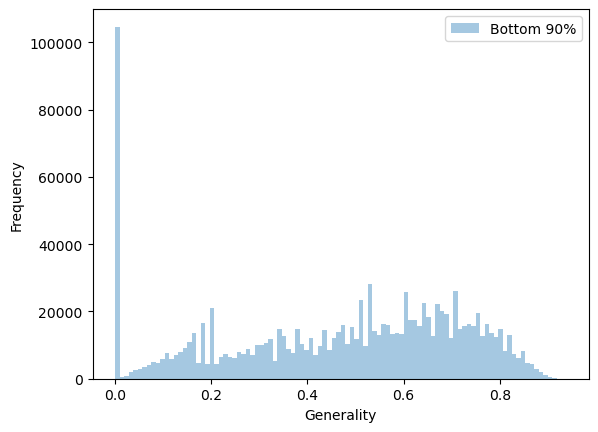

In [236]:
plt.figure()
sns.distplot(bottom90_subclass['generality_10yr_adjusted'], bins=100, kde=False, label='Bottom 90%')
plt.xlabel('Generality')
plt.ylabel('Frequency')
plt.legend()

In [282]:
top10_subclass['kelly_significant'] = top10_subclass['kelly_significant'].fillna(0)
top10_subclass['halloffame'] = top10_subclass['halloffame'].fillna(0)
bottom90_subclass['kelly_significant'] = bottom90_subclass['kelly_significant'].fillna(0)
bottom90_subclass['halloffame'] = bottom90_subclass['halloffame'].fillna(0)

/state/partition1/job-50919294/ipykernel_3311748/3421582275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_subclass['kelly_significant'] = top10_subclass['kelly_significant'].fillna(0)
/state/partition1/job-50919294/ipykernel_3311748/3421582275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_subclass['halloffame'] = top10_subclass['halloffame'].fillna(0)
/state/partition1/job-50919294/ipykernel_3311748/3421582275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [283]:
top10['kelly_significant'] = top10['kelly_significant'].fillna(0)
top10['halloffame'] = top10['halloffame'].fillna(0)
bottom90['kelly_significant'] = bottom90['kelly_significant'].fillna(0)
bottom90['halloffame'] = bottom90['halloffame'].fillna(0)

/state/partition1/job-50919294/ipykernel_3311748/130547012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['kelly_significant'] = top10['kelly_significant'].fillna(0)
/state/partition1/job-50919294/ipykernel_3311748/130547012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['halloffame'] = top10['halloffame'].fillna(0)
/state/partition1/job-50919294/ipykernel_3311748/130547012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [284]:
top10_subclass.columns

Index(['patent_id', 'patent_date', 'patent_title', 'num_claims', 'withdrawn',
       'bsim5', 'fsim01', 'fsim25', 'fsim610', 'lqsim05', 'lqsim010',
       'bk_p90_alqsim05', 'bk_p90_alqsim010', 'fcitALL', 'backward_citations',
       'cd_5', 'mcd_5', 'i_5', 'cd_10', 'mcd_10', 'i_10', 'cd_2017y',
       'mcd_2017y', 'i_2017y', 'permno', 'xi_nominal', 'xi_real', 'cites',
       'new_word', 'new_word_reuse', 'new_bigram', 'new_bigram_reuse',
       'new_trigram', 'new_trigram_reuse', 'new_word_comb',
       'new_word_comb_reuse', 'backward_cosine', 'forward_cosine',
       'filing_date', 'generality_10yr', 'citations_10yr', 'cpc_subclass',
       'filing_year', 'generality_10yr_adjusted', 'kelly_significant',
       'halloffame', 'at', 'prcc_f', 'csho', 'sale', 'emp', 'ppent', 'teq',
       '_merge', 'gvkey', 'naicsh', 'sich', 'assignee_sequence', 'assignee_id',
       'disambig_assignee_individual_name_first',
       'disambig_assignee_individual_name_last',
       'disambig_assignee_org

In [299]:
top10['has_gvkey'] = top10['gvkey'].notna().astype(int)
top10_subclass['has_gvkey'] = top10_subclass['gvkey'].notna().astype(int)
bottom90['has_gvkey'] = bottom90['gvkey'].notna().astype(int)
bottom90_subclass['has_gvkey'] = bottom90_subclass['gvkey'].notna().astype(int)

/state/partition1/job-50919294/ipykernel_3311748/1223417831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['has_gvkey'] = top10['gvkey'].notna().astype(int)
/state/partition1/job-50919294/ipykernel_3311748/1223417831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_subclass['has_gvkey'] = top10_subclass['gvkey'].notna().astype(int)
/state/partition1/job-50919294/ipykernel_3311748/1223417831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [294]:
len(top10_subclass[top10_subclass['gvkey'].notna()])/len(top10_subclass)

0.39961346681612614

In [296]:
len(top10[top10['gvkey'].notna()])/len(top10)

0.3757732362383525

In [300]:
# compare summary statistics between top10_subclass and bottom90_subclass
column = 'has_gvkey'
pd.DataFrame([top10_subclass[column].describe(),bottom90_subclass[column].describe(),top10[column].describe(),bottom90[column].describe()], index=['top10_subclass','bottom90_subclass','top10_total','bottom90_total'])



,count,mean,std,min,25%,50%,75%,max
top10_subclass,129355.0,0.399613,0.489821,0.0,0.0,0.0,1.0,1.0
bottom90_subclass,1164337.0,0.450517,0.497546,0.0,0.0,0.0,1.0,1.0
top10_total,127710.0,0.375773,0.484324,0.0,0.0,0.0,1.0,1.0
bottom90_total,1165982.0,0.453057,0.497792,0.0,0.0,0.0,1.0,1.0


In [266]:
# compare summary statistics between top10_subclass and bottom90_subclass
column = 'at'
pd.DataFrame([top10[column].describe(),bottom90[column].describe()])



,count,mean,std,min,25%,50%,75%,max
at,47905.0,48585.529317,108522.157542,0.463,3375.332,15103.0,45132.0,2415689.0
at,527053.0,44476.995990,103447.627036,0.113,3647.649,15765.0,48492.0,2819627.0


In [263]:
patent_measures_assignee[patent_measures_assignee['kelly_significant']==1]['generality_10yr_adjusted'].describe()

count    38.000000
mean      0.638367
std       0.209822
min       0.000000
25%       0.548772
50%       0.669407
75%       0.737359
max       1.000000
Name: generality_10yr_adjusted, dtype: float64

In [264]:
patent_measures_assignee[patent_measures_assignee['kelly_significant']==1].sort_values('generality_10yr_adjusted',ascending=False)

,patent_id,patent_date,patent_title,num_claims,withdrawn,bsim5,fsim01,fsim25,fsim610,lqsim05,...,assignee_id,disambig_assignee_individual_name_first,disambig_assignee_individual_name_last,disambig_assignee_organization,assignee_type,location_id,disambig_state,disambig_country,generality_top10,generality_top10_subclass
2596423,4590598,1986-05-20,Pulsed laser system,19,0,5694430.0,1216793.0,5795753.0,8677048.0,0.208212,...,a438b52e-e2ef-474b-931b-0cb66b8967bf,NaN,NaN,Brit Corporation,2.0,15c69712-16c8-11ed-9b5f-1234bde3cd05,CA,US,0,0
4267808,6230409,2001-05-15,Molded building panel and method of construction,19,0,6618504.0,1821747.0,7978128.0,9476023.0,0.392500,...,0763b6eb-11a5-458f-8e45-16bb7694ab7d,NaN,NaN,Earth Products Limited,2.0,cdb81029-16c7-11ed-9b5f-1234bde3cd05,KS,US,0,0
3212358,5194299,1993-03-16,Repositionable pressure-sensitive adhesive she...,5,0,1737250.0,459007.0,2141680.0,3353300.0,0.403472,...,48946b00-af6b-4f7c-9789-6cb0a571cee8,NaN,NaN,Minnesota Mining and Manufacturing Company,2.0,cb5e57a6-16c7-11ed-9b5f-1234bde3cd05,MN,US,0,0
2849528,4838644,1989-06-13,"Position, rotation, and intensity invariant re...",6,0,3716779.0,1095634.0,5218952.0,9370547.0,0.530005,...,74879412-5b43-4b4a-bedb-380a07b619af,NaN,NaN,United States Department of Energy,2.0,fe1dd7c7-16c7-11ed-9b5f-1234bde3cd05,DC,US,1,0
2440353,4437122,1984-03-13,Low resolution raster images,27,0,NaN,NaN,NaN,NaN,NaN,...,b670f17c-7e92-426e-8b0e-b486ec29cedd,NaN,NaN,Xerox Corporation,2.0,0cd1998f-16c8-11ed-9b5f-1234bde3cd05,CT,US,1,0
4498539,6455275,2002-09-24,DNA construct for producing proteinaceous mate...,20,0,2571679.0,870010.0,4834164.0,4630010.0,0.796639,...,1bead90f-1cc7-4b00-8898-f51aeb28e0f5,NaN,NaN,The Trustees of Columbia University in the Cit...,2.0,92237ca2-16c8-11ed-9b5f-1234bde3cd05,NY,US,0,0
3774793,5747282,1998-05-05,17Q-linked breast and ovarian cancer susceptib...,20,0,1230366.0,493102.0,2900158.0,3853879.0,1.014479,...,ebbdf27b-f164-4649-baa8-cb8e1e463c67,NaN,NaN,"Myraid Genetics, Inc.",2.0,c1bffd96-16c7-11ed-9b5f-1234bde3cd05,UT,US,0,0
3774792,5747282,1998-05-05,17Q-linked breast and ovarian cancer susceptib...,20,0,1230366.0,493102.0,2900158.0,3853879.0,1.014479,...,53331066-e3aa-4bf3-9dee-e2e637f1287d,NaN,NaN,"The United States of America, as represented b...",6.0,fe1dd7c7-16c7-11ed-9b5f-1234bde3cd05,DC,US,0,0
3774791,5747282,1998-05-05,17Q-linked breast and ovarian cancer susceptib...,20,0,1230366.0,493102.0,2900158.0,3853879.0,1.014479,...,901fb89c-e217-4435-9a94-b319b9e36c25,NaN,NaN,UNIVERSITY OF UTAH RESEARCH FOUNDATION,2.0,c1bffd96-16c7-11ed-9b5f-1234bde3cd05,UT,US,0,0
3990565,5960411,1999-09-28,Method and system for placing a purchase order...,26,0,1753800.0,1271731.0,7608973.0,10605030.0,1.622096,...,e5217be7-a32b-4c00-b37a-76ca587936f3,NaN,NaN,"Amazon.com, Inc.",2.0,5836da24-16c8-11ed-9b5f-1234bde3cd05,WA,US,0,0


In [312]:
patent_measures_assignee.groupby('disambig_country')[['generality_top10','generality_top10_subclass']].agg({'count', 'mean'}).reset_index().sort_values('generality_top10_subclass', ascending=False).iloc[:10]

ValueError: The column label 'generality_top10_subclass' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

In [314]:
patent_measures_assignee[patent_measures_assignee['disambig_country']=='US']['generality_top10'].mean()

0.021522678860332677

/state/partition1/job-50919294/ipykernel_3311748/2340471758.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generality_10['generality_10yr_adjusted'], bins=100, kde=False)


Text(0, 0.5, 'Frequency')

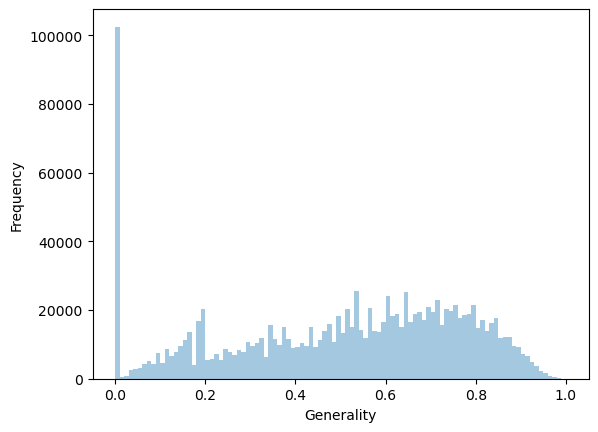

In [305]:
plt.figure()
sns.distplot(generality_10['generality_10yr_adjusted'], bins=100, kde=False)
plt.xlabel('Generality')
plt.ylabel('Frequency')


In [2]:
with open('patent_measures_assignee.pkl', 'rb') as file:
    pma = pickle.load(file)

In [3]:
marx = pd.read_csv('marx_assignee_age.csv')

/state/partition1/job-51257244/ipykernel_3378508/3849404225.py:1: DtypeWarning: Columns (0,5,6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  marx = pd.read_csv('marx_assignee_age.csv')


In [5]:
len(marx)

3560905

In [7]:
len(marx.drop_duplicates('patent_id'))

3533293

In [12]:
marx[marx.duplicated('patent_id')]

,patent_id,june2022assignee_id,organization,university,Found in OC,jurisdiction_code,company_number,UO_DISCERN,SUB_DISCERN,gvkey,CUSIP,founding_year,first_year_publicly_listed,founding_score,VC_backed_assignee,VC_score
2331,7671171,7f87d4f8-9088-492d-8202-0d0353c1c3ea,E. I. Du Pont de Nemours and Company,0,1,Us_De,48306,1,0,4087.0,263534109,1802.0,1950.0,10.0,0,NaN
30178,8561781,195d2926-115b-49ca-93c9-8329bc7eeaed,"Santa Rosa Systems, LLC",0,1,Us_Ky,0799253,0,0,NaN,NaN,2011.0,NaN,10.0,0,NaN
30452,7812216,01215211-4888-40cf-a8bb-bc1ddaec17ab,"Pioneer Hi-Bred International, Inc.",0,1,Us_De,1009013,0,1,4087.0,263534109,1964.0,NaN,10.0,0,NaN
30945,4227042,b2b3cb83-a3c1-47cc-8e54-59b1946bb522,"Western Electric Company, Inc.",0,0,NaN,NaN,0,1,1581.0,001957505,NaN,NaN,NaN,0,NaN
55037,4007992,758941ba-df82-4fbc-9872-aea5817ca993,Techmet Corporation,0,1,Us_Oh,421420,0,0,NaN,NaN,1972.0,NaN,8.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560633,RE38431,80bf4d37-2cbf-4ef1-9fa8-3ff4aff089ef,American National Red Cross,0,1,Us_Ks,7263692,0,0,NaN,NaN,1924.0,NaN,8.0,0,NaN
3560721,RE42012,8c27b378-fcf4-44c3-8feb-797438badf72,The Penn State Research Foundation,0,1,Us_Pa,274094,0,0,NaN,NaN,1934.0,NaN,8.0,0,NaN
3560722,RE42072,8c27b378-fcf4-44c3-8feb-797438badf72,The Penn State Research Foundation,0,1,Us_Pa,274094,0,0,NaN,NaN,1934.0,NaN,8.0,0,NaN
3560739,RE42700,0e814797-9677-4c11-8231-9a7cbcfd4940,SRI International,0,1,Us_Ca,640783,0,0,NaN,NaN,1971.0,NaN,9.0,0,NaN


In [15]:
pma['patent_id'].dtype

dtype('int64')

In [16]:
marx['patent_id'].dtype

dtype('O')

In [25]:
marx['patent_id'].str.isnumeric().unique()

array([ True, False])

In [24]:
marx['patent_id'] = marx['patent_id'].astype(str)

In [26]:
marx = marx[marx['patent_id'].str.isnumeric()]

In [27]:
marx

,patent_id,june2022assignee_id,organization,university,Found in OC,jurisdiction_code,company_number,UO_DISCERN,SUB_DISCERN,gvkey,CUSIP,founding_year,first_year_publicly_listed,founding_score,VC_backed_assignee,VC_score
0,5856666,ce408f15-1f08-43b0-bcbd-25313822ccd7,U.S. Philips Corporation,0,1,Us_De,696511,1,0,7946.0,657045001,1891.0,1959.0,10.0,0,NaN
1,6584517,631d8a77-2272-4d20-aea2-d6937ec9b800,Cypress Semiconductor Corporation,0,1,Us_Ca,C1129123,1,0,12215.0,232806109,1982.0,1986.0,10.0,1,10.0
3,8709412,a88c39af-8ae7-4325-a152-fc04fd9e4731,"Childrens Hospital, Inc.",0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,6429787,fe045948-363e-49b4-ad3d-d863c8458e52,"Crosslink, Inc.",0,1,Us_Co,19951095343,0,0,NaN,NaN,1995.0,NaN,8.0,1,7.0
5,4544673,aa57a3b7-f085-4ec5-828a-2efb0ab8fe35,The Standard Oil Company,0,1,Us_Ok,2300111548,1,0,2991.0,166764100,1879.0,1950.0,10.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555520,9999805,4709c1bf-4984-40ac-b285-1b1ed2138c93,International Business Machines Corporation,0,1,Us_Ga,H855773,1,0,6066.0,459200101,1911.0,1950.0,10.0,0,NaN
3555521,9999875,ad65aacb-7e13-48b7-b2b8-3ef590602675,Toyota Motor Engineering & Manufacturing North...,0,1,Us_Ky,0422100,0,0,NaN,NaN,1996.0,NaN,10.0,0,NaN
3555522,9999899,4709c1bf-4984-40ac-b285-1b1ed2138c93,International Business Machines Corporation,0,1,Us_Ga,H855773,1,0,6066.0,459200101,1911.0,1950.0,10.0,0,NaN
3555523,9999905,4709c1bf-4984-40ac-b285-1b1ed2138c93,International Business Machines Corporation,0,1,Us_Ga,H855773,1,0,6066.0,459200101,1911.0,1950.0,10.0,0,NaN


In [28]:
len(marx.drop_duplicates('patent_id'))

3226420

In [30]:
marx['patent_id'] = marx['patent_id'].astype(int)

/state/partition1/job-51257244/ipykernel_3378508/689295611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marx['patent_id'] = marx['patent_id'].astype(int)


In [34]:
marx[marx.duplicated('patent_id', keep='first')].sort_values('patent_id')

,patent_id,june2022assignee_id,organization,university,Found in OC,jurisdiction_code,company_number,UO_DISCERN,SUB_DISCERN,gvkey,CUSIP,founding_year,first_year_publicly_listed,founding_score,VC_backed_assignee,VC_score
550562,3930285,5ca4c508-7920-463a-8f9c-a3b0255b2183,"Lummus Industries, Inc.",0,1,Us_La,27006460F,0,0,NaN,NaN,1965.0,NaN,8.0,0,NaN
2892937,3930295,fde22532-c512-41a9-b27b-5de852480417,Watkins-Johnson Company,0,0,NaN,NaN,1,0,11312.0,942486101,1957.0,1964.0,10.0,0,NaN
1780754,3932160,bf13084d-d864-4ac4-a597-fa2bb69313cd,"Bell Telephone Laboratories, Incorporated",0,1,Us_Nj,1993001000,1,0,1581.0,001957505,1925.0,1950.0,10.0,0,NaN
3117103,3932621,f0739b10-e2b8-4624-8a40-ef5afffba941,NaN,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN
3150154,3934528,a2243b43-143c-4111-9cf4-3271f2d8baaa,"Deep Oil Technology, Inc.",0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312767,11212289,b70a6aca-2968-4976-b742-1540558580b0,"At&T Intellectual Property I, L.P.",0,0,NaN,NaN,0,1,9899.0,00206R102,NaN,NaN,NaN,0,NaN
3312769,11212320,b70a6aca-2968-4976-b742-1540558580b0,"At&T Intellectual Property I, L.P.",0,0,NaN,NaN,0,1,9899.0,00206R102,NaN,NaN,NaN,0,NaN
3312778,11212710,b70a6aca-2968-4976-b742-1540558580b0,"At&T Intellectual Property I, L.P.",0,0,NaN,NaN,0,1,9899.0,00206R102,NaN,NaN,NaN,0,NaN
3312779,11212726,b70a6aca-2968-4976-b742-1540558580b0,"At&T Intellectual Property I, L.P.",0,0,NaN,NaN,0,1,9899.0,00206R102,NaN,NaN,NaN,0,NaN
